<p><font size="7" color='grey'> <b>
Anwendung Generativer KI
</b></font> </br></p>

<p><font size="6" color='grey'> <b>
Fine Tuning
</b></font> </br></p>


---

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Colab-Umfeld</font> </br></p>
# Installierte Python Version
import sys
print(f"Python Version: ",sys.version)
# Installierte LangChain Bibliotheken
print()
print("Installierte LangChain Bibliotheken:")
!pip list | grep '^langchain'
# Unterdrückt die "DeprecationWarning" von LangChain für die Memory-Funktionden
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="langsmith.client")

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  SetUp API-Keys (setup_api_keys)</font> </br></p>
def setup_api_keys():
    """Konfiguriert alle benötigten API-Keys aus Google Colab userdata"""
    from google.colab import userdata
    import os
    from os import environ

    # Dictionary der benötigten API-Keys
    keys = {
        'OPENAI_API_KEY': 'OPENAI_API_KEY',
        'HF_TOKEN': 'HF_TOKEN',
        # Weitere Keys bei Bedarf
    }

    # Keys in Umgebungsvariablen setzen
    for env_var, key_name in keys.items():
        environ[env_var] = userdata.get(key_name)

    return {k: environ[k] for k in keys.keys()}

# Verwendung
all_keys = setup_api_keys()
# Bei Bedarf einzelne Keys direkt zugreifen
# WEATHER_API_KEY = all_keys['WEATHER_API_KEY']


# **1 <font color='orange'>|</font> Grundlagen**
---

OpenAI ermöglicht die Feinabstimmung von Modellen wie GPT-3.5 und GPT-4, um sie mit domänenspezifischen Daten für bestimmte Anwendungen zu optimieren. Dabei wird ein kuratierter Datensatz genutzt, um die Modellgewichte anzupassen und die Leistung in spezialisierten Aufgaben wie präziseren Vorhersagen, strukturierter Ausgabe oder markenkonformer Kommunikation zu verbessern. Dieser Ansatz ist besonders nützlich in Bereichen wie Finanzen, Gesundheitswesen oder Kundendienst.

Vorteile der Feinabstimmung:
- Höhere Ergebnisqualität als durch Standard-Prompts  
- Training mit mehr Beispielen als in eine einzelne Eingabe passt  
- Kürzere, effizientere Prompts für geringeren Token-Verbrauch  
- Schnellere Antwortzeiten durch spezialisierte Modelle  

Anwendungsfälle:
- **Stil und Ton** – Anpassung der Ausdrucksweise  
- **Strukturierte Ausgabe** – Erzwungene Formate wie JSON oder XML  
- **Tool Calling** – Nutzung von Werkzeugen auf definierte Weise  
- **Funktionsaufruf** – Gezielte Interaktion mit Funktionen  
<br>
<br>

**Weitere Informationen:**    
[OpenAI Finetuning Guide](https://platform.openai.com/docs/guides/fine-tuning)


<p><font color='black' size="5">
Was ist Feinabstimmung?
</font></p>



Die Textgenerierungsmodelle von OpenAI sind mit einem umfangreichen Datensatz vortrainiert und vielseitig einsetzbar. Standardmäßig erfordern sie jedoch präzise formulierte Eingaben und Beispiele, um gewünschte Ergebnisse zu erzielen. Diese „Few-Shot-Learning“-Methode ist begrenzt durch die Anzahl der Beispiele, die in einer Eingabe untergebracht werden können.

Feinabstimmung geht darüber hinaus, indem das Modell mit einer größeren Menge spezifischer Beispiele trainiert wird. Dadurch werden die internen Gewichte angepasst, sodass das Modell Aufgaben oder Domänen präziser verarbeitet. Das führt zu genaueren und zuverlässigeren Ergebnissen, reduziert den Bedarf an langen Eingaben, senkt Kosten und verbessert die Reaktionsgeschwindigkeit.



<p><font color='black' size="5">
Feinabstimmungsprozess
</font></p>



Die Feinabstimmung erfolgt in mehreren Schritten:  

1. **Trainingsdaten vorbereiten und hochladen** – Der Datensatz sollte relevante Beispiele enthalten, die die gewünschte Aufgabe oder Domäne abdecken.  
2. **Modell trainieren** – Das Modell wird mit diesen Daten angepasst, sodass seine Parameter optimal auf die spezifischen Anforderungen abgestimmt sind.  
3. **Ergebnisse bewerten und optimieren** – Nach dem Training wird die Leistung überprüft. Falls nötig, können Daten oder Modellkonfigurationen angepasst und das Training wiederholt werden.

<p><font color='black' size="5">
Implementierung/Nutzung des FT-Modells
</font></p>



Sobald das Modell die gewünschten Ergebnisse liefert, kann es in der Produktion eingesetzt werden. Dies ermöglicht schnellere und kosteneffizientere Antworten, die speziell auf die jeweilige Anwendung zugeschnitten sind.  

Feinabgestimmte Modelle verbessern die Effizienz und Spezialisierung, wodurch Zeit und Ressourcen gespart werden, während die Qualität der Ergebnisse steigt. Details zu den Kosten finden Sie auf der [OpenAI-Preisseite](https://openai.com/pricing).



<p><font color='black' size="5">
Datenformate
</font></p>



Das LLM-Trainingsformat basiert auf einem dialogbasierten Ansatz, der speziell für Chatbots und ähnliche Anwendungen genutzt wird. Dabei wird der Austausch in „Nachrichten“ strukturiert, die jeweils einer bestimmten **Rolle** zugewiesen sind:  

- **System**: Definiert die allgemeinen Anweisungen oder den Ton des Assistenten.  
- **Benutzer**: Stellt Fragen oder gibt Eingaben vor.  
- **Assistent**: Generiert Antworten basierend auf der Eingabe und dem Kontext.  

Dieses Format hilft dem Modell, durch wiederholte Interaktionen zu lernen, wie es kontextgerechte und stilistisch passende Antworten formuliert. Die **System-Nachricht** gibt eine einheitliche Richtung vor (z. B. einen sarkastischen Stil), während der restliche Dialog das gewünschte Verhalten trainiert.  

Beispiel für ein sarkastisches Modell:  

```json
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, {"role": "user", "content": "What's the capital of France?"}, {"role": "assistant", "content": "Paris, as if everyone doesn't know that already."}]}
```  

Dieses Format ermöglicht es dem Modell, verschiedene Gesprächsstile und Reaktionsweisen gezielt zu erlernen.



<p><font color='black' size="5">
Feinabstimmungskosten
</font></p>



Die Feinabstimmung eines großen Sprachmodells (LLM) kann mit hohen Kosten verbunden sein – sowohl beim Training als auch im laufenden Betrieb.  

- **Trainingskosten**: Die Anpassung eines Modells erfordert erhebliche Rechenleistung, insbesondere bei großen Datensätzen. Dies kann zu hohen Ausgaben für Cloud-Dienste oder Spezialhardware führen.  
- **Betriebskosten**: Nach der Feinabstimmung verursacht das Hosting des Modells fortlaufende Kosten für Infrastruktur und Echtzeitverarbeitung, die je nach Nutzung skaliert werden müssen.  



# **2 <font color='orange'>|</font> Fine-Tuning mit Dashboard**
---

Die Feinabstimmung der Modelle beginnt über die OpenAI-Website. Anschließend folgt die Nutzung der API.  

Zunächst werden zwei Dateien benötigt:  
1. **Trainingsdatei** – Enthält die Daten zur Anpassung des Modells.  
2. **Validierungsdatei** – Dient zur Überprüfung der Trainingsqualität.  

Im nächsten Abschnitt wird erläutert, wie die API für diesen Prozess genutzt wird.

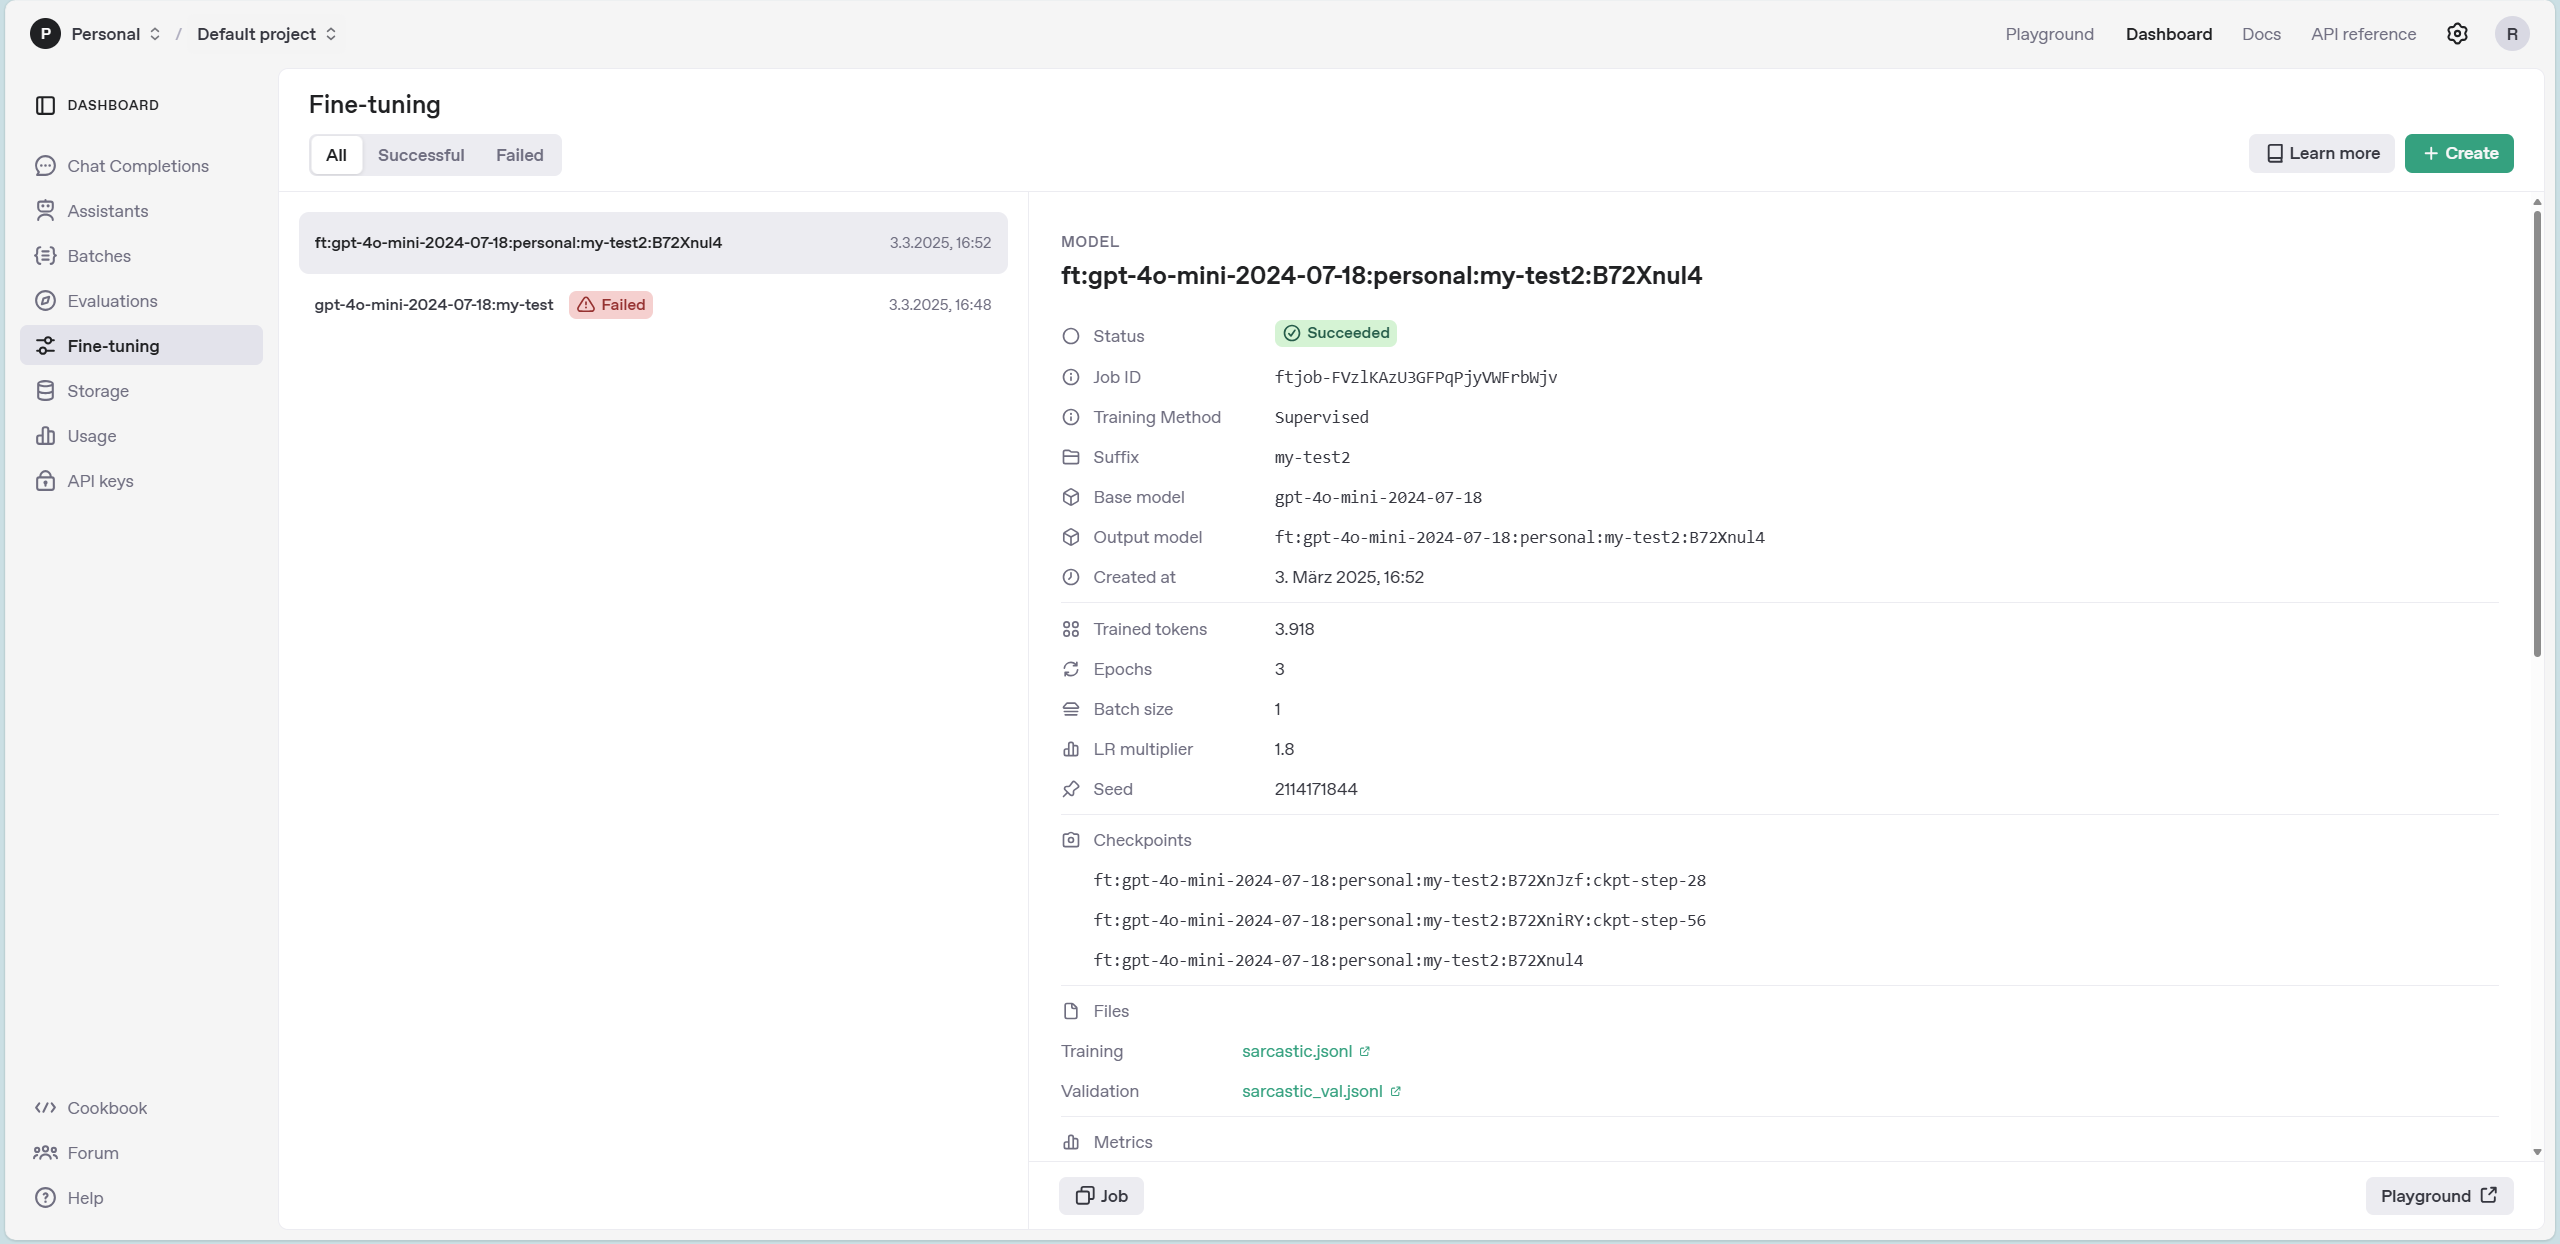

Die Erstellung *fein-abgestimmter* Modelle beginnt mit dem **Hochladen der Trainingsdateien** in den Trainingsdialog. Dort können alle erforderlichen **Trainingsparameter** definiert werden.  

Weitere Anpassungen lassen sich über den **Chat Playground** vornehmen:  
[Chat Playground - OpenAI API](https://platform.openai.com/playground/chat?preset=default-marv-sarcastic-chat)



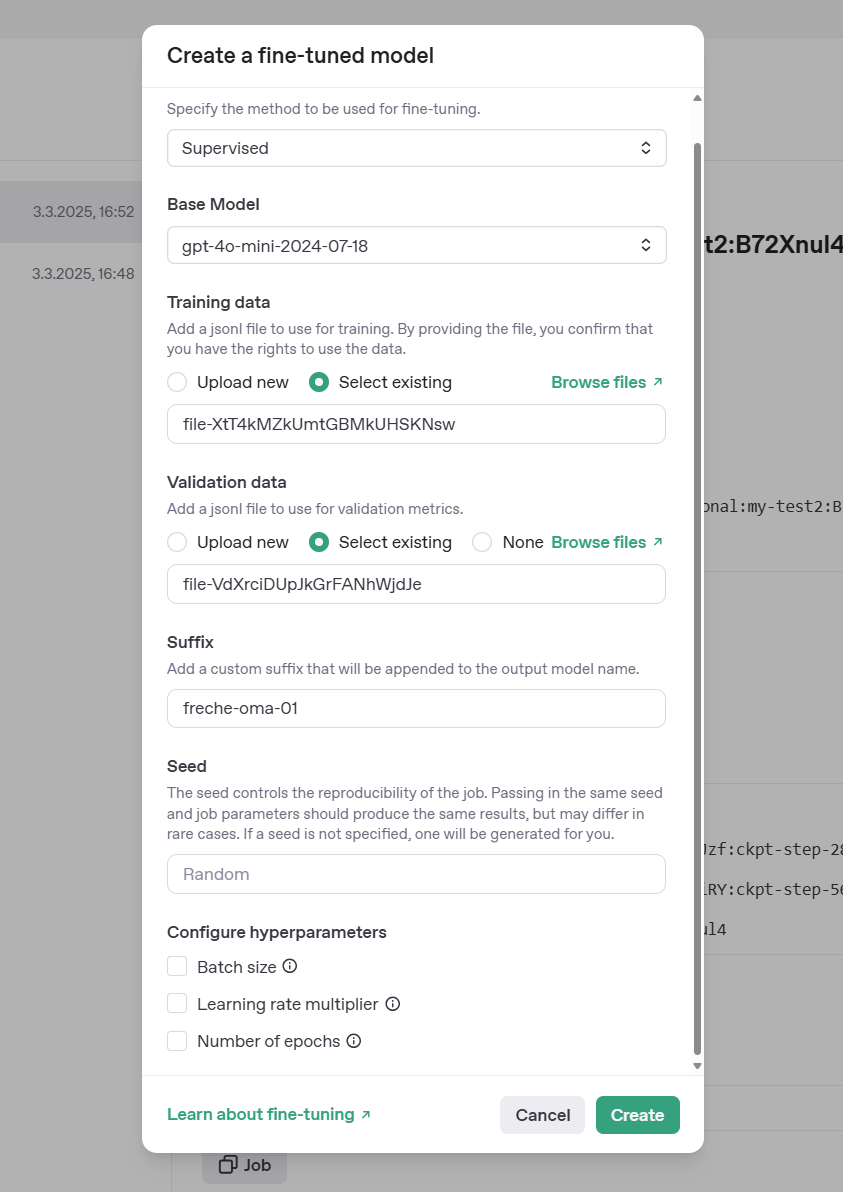

**Anzeige während des Trainings**

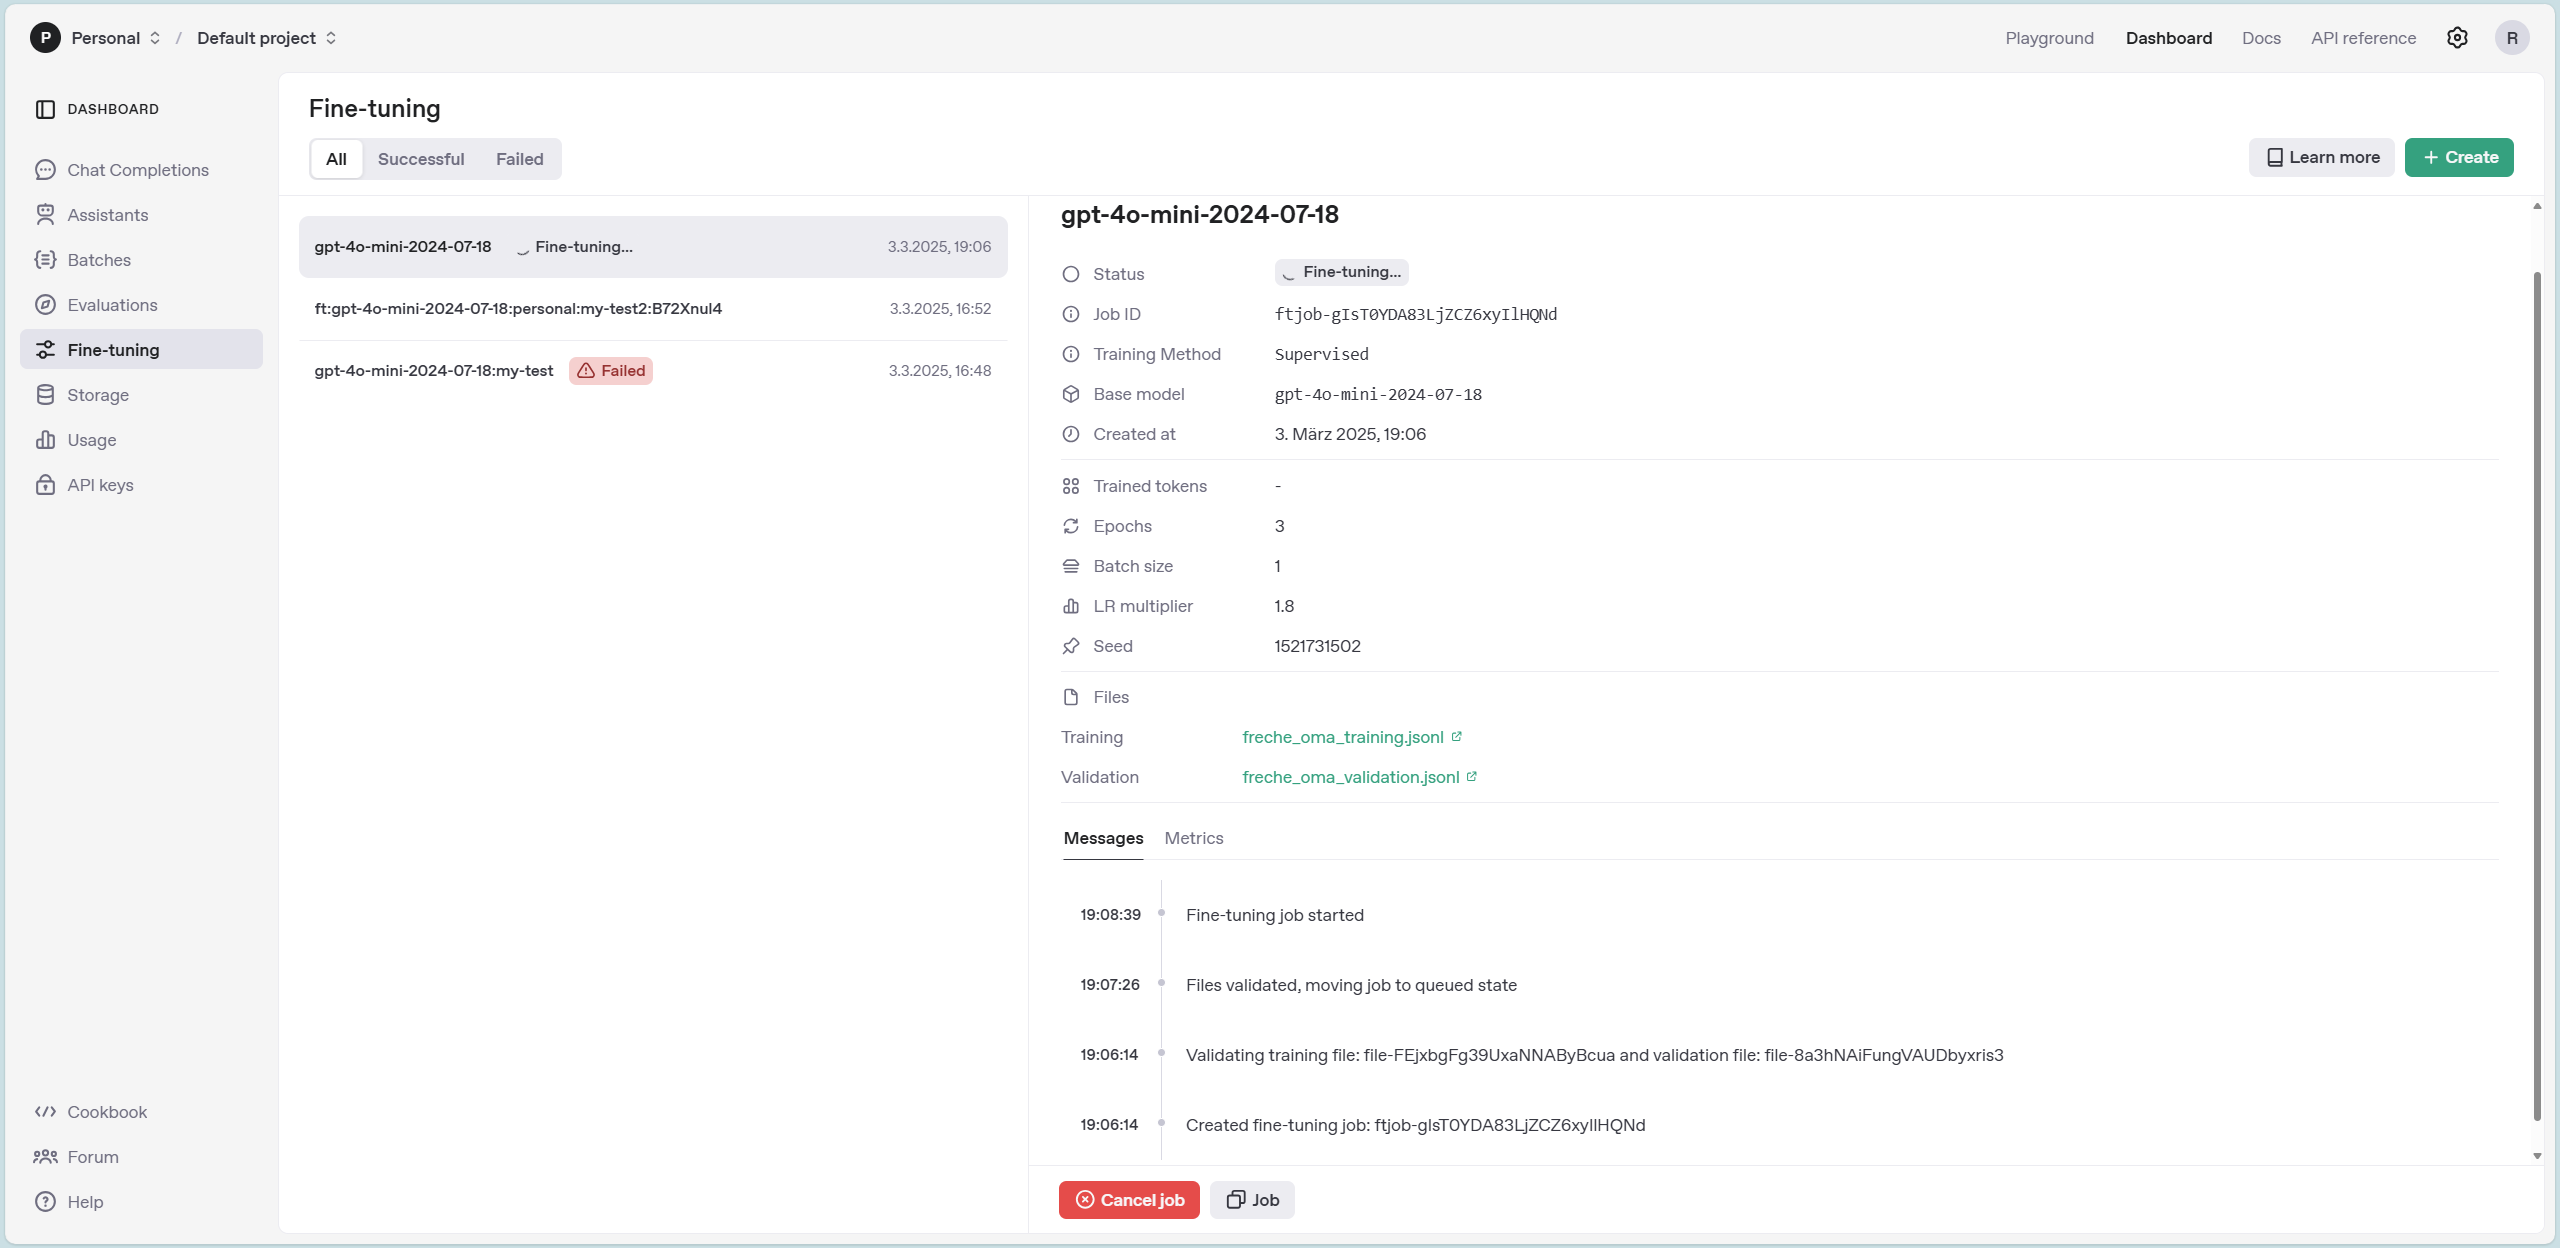

Nach Abschluss des Trainings steht das optimierte Modell zur Verfügung. Wichtig zu beachten: **Bei OpenAI können vorab trainierte Modelle nicht gelöscht werden.** Allerdings entstehen keine Kosten für deren Speicherung – abgerechnet werden lediglich die **Trainings- und Inferenzzeit**.

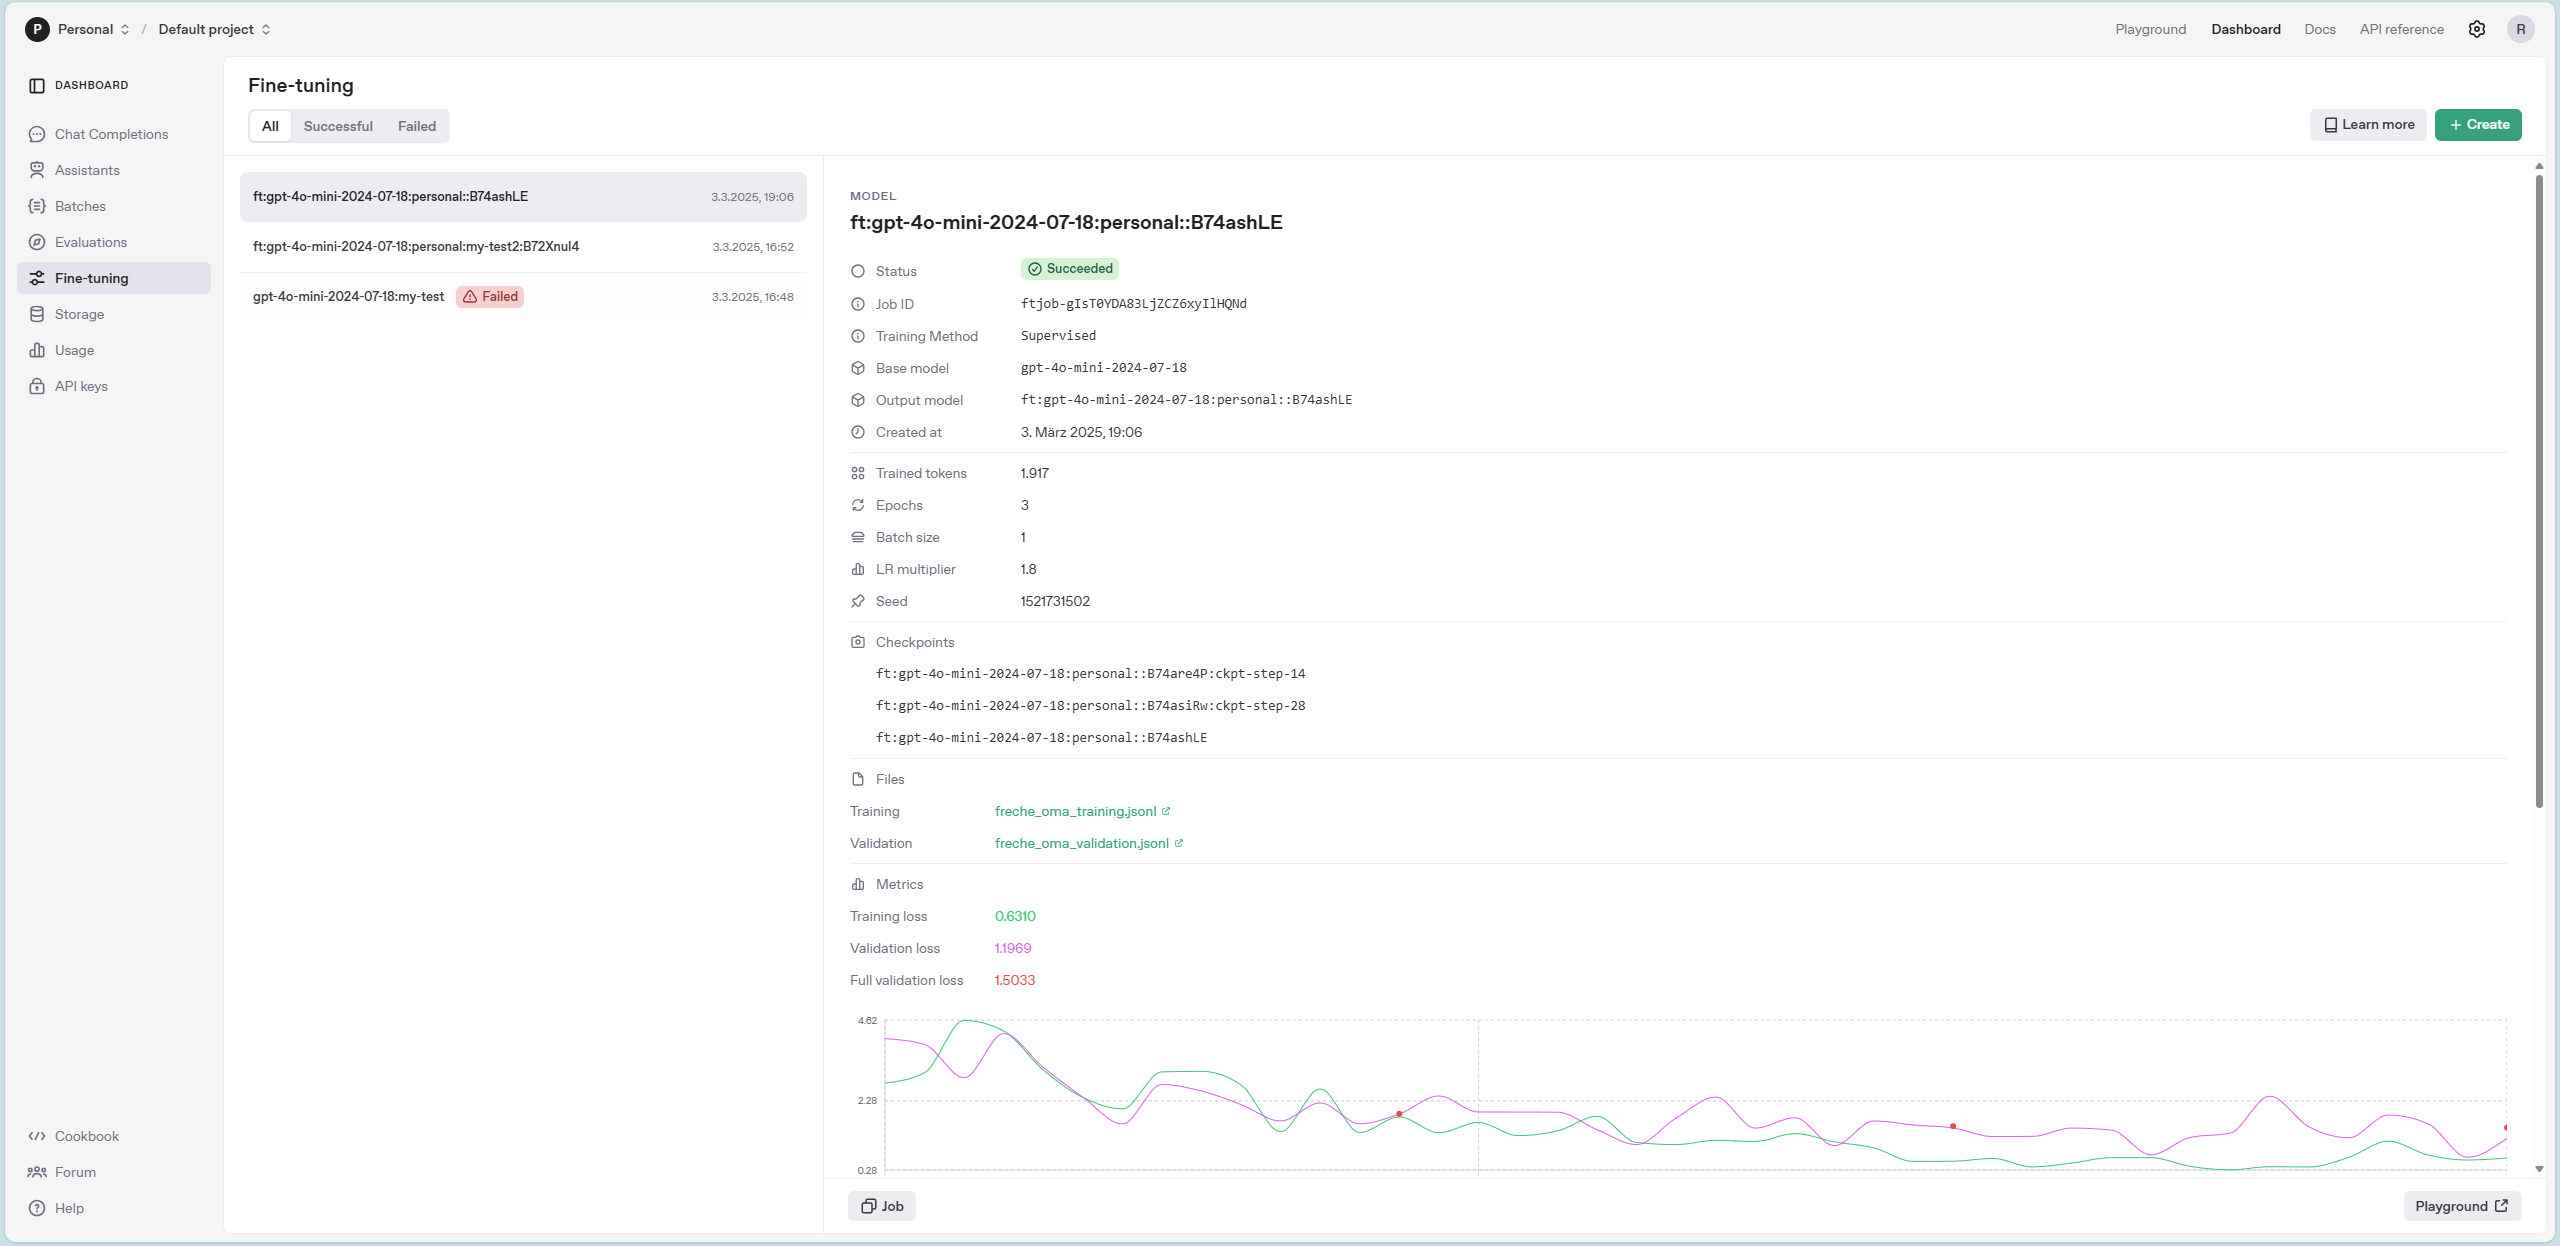

**Trainingsverlauf**

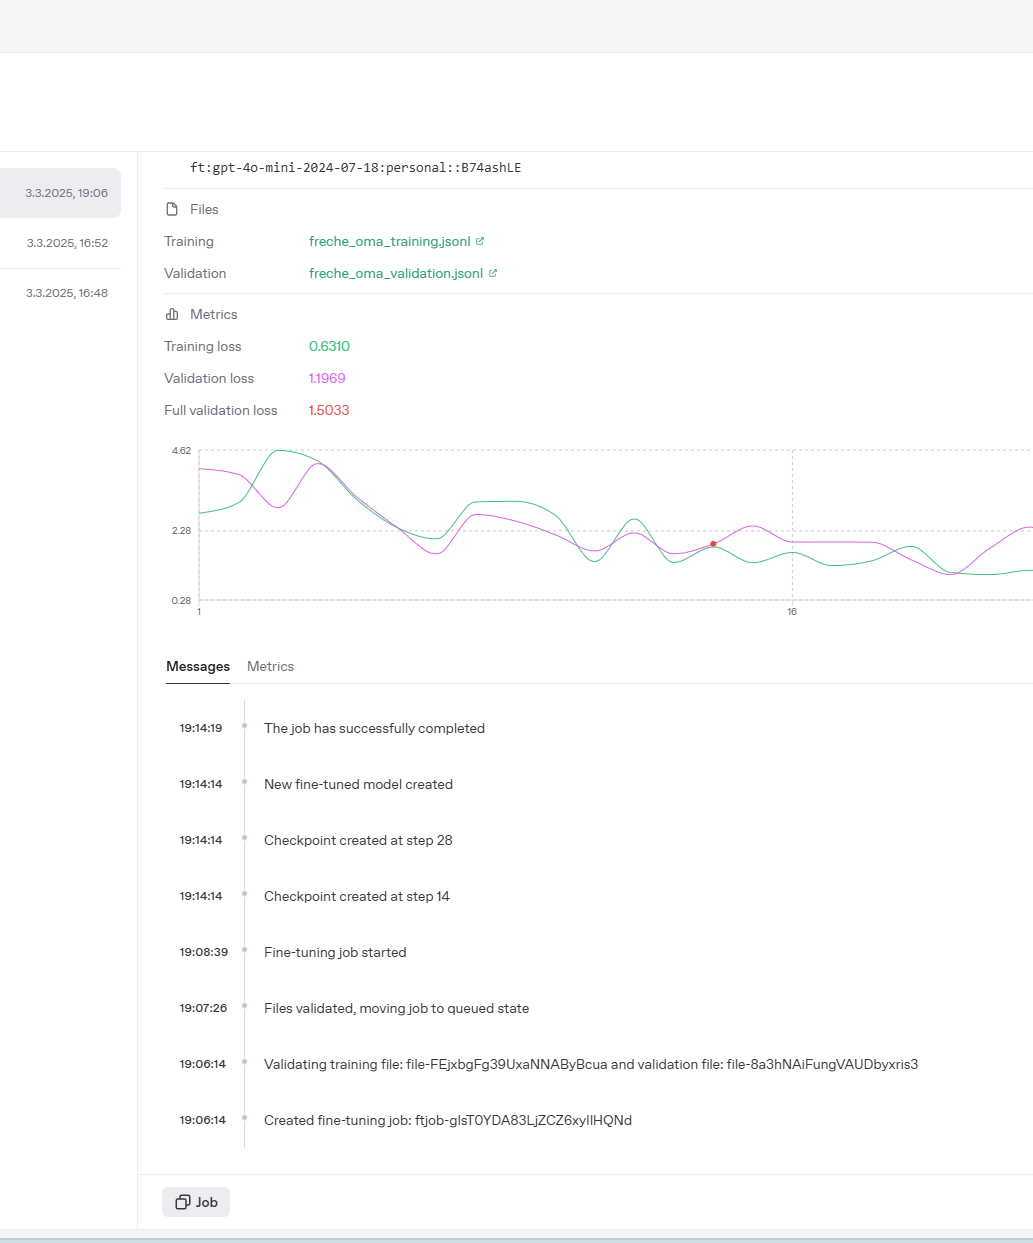

**Metriken**

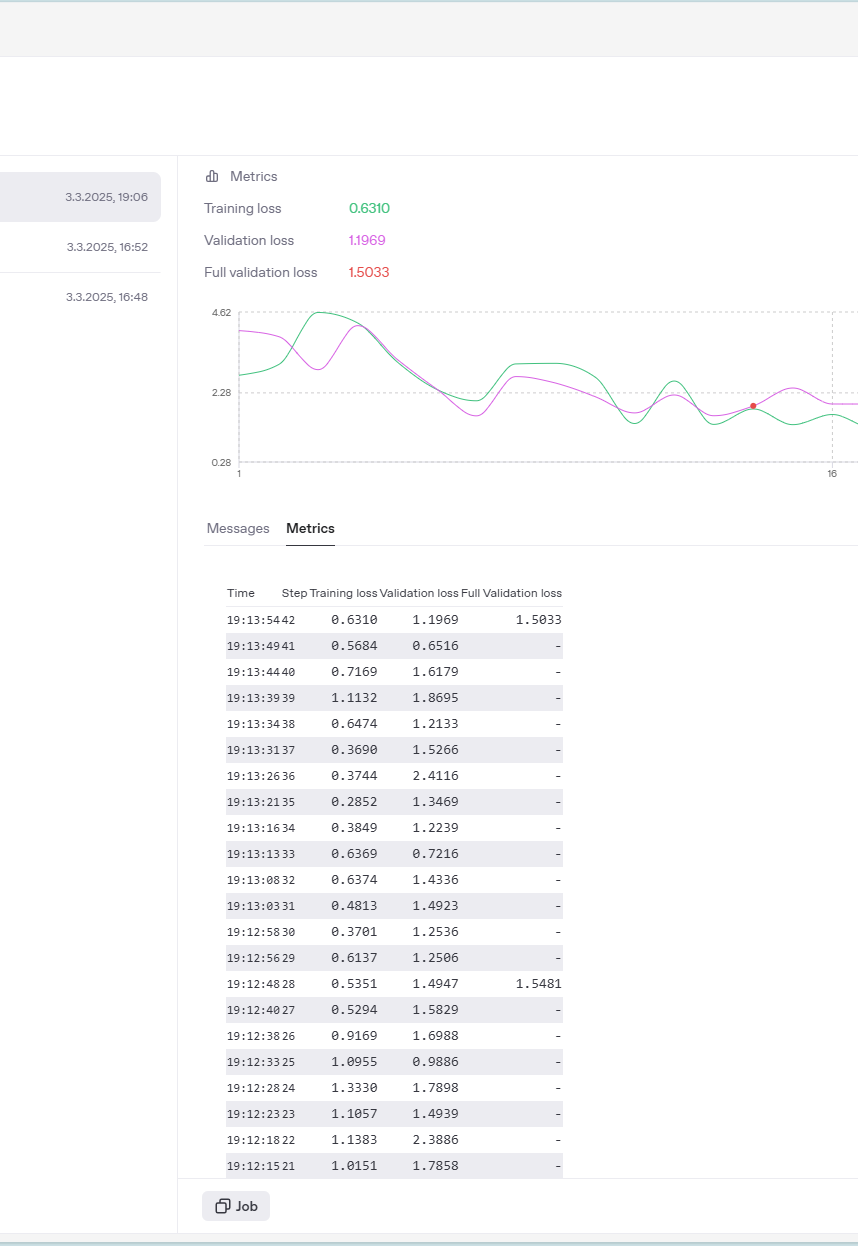

**Anwendung des Fine-Tuned-Model m. System-Prompt**

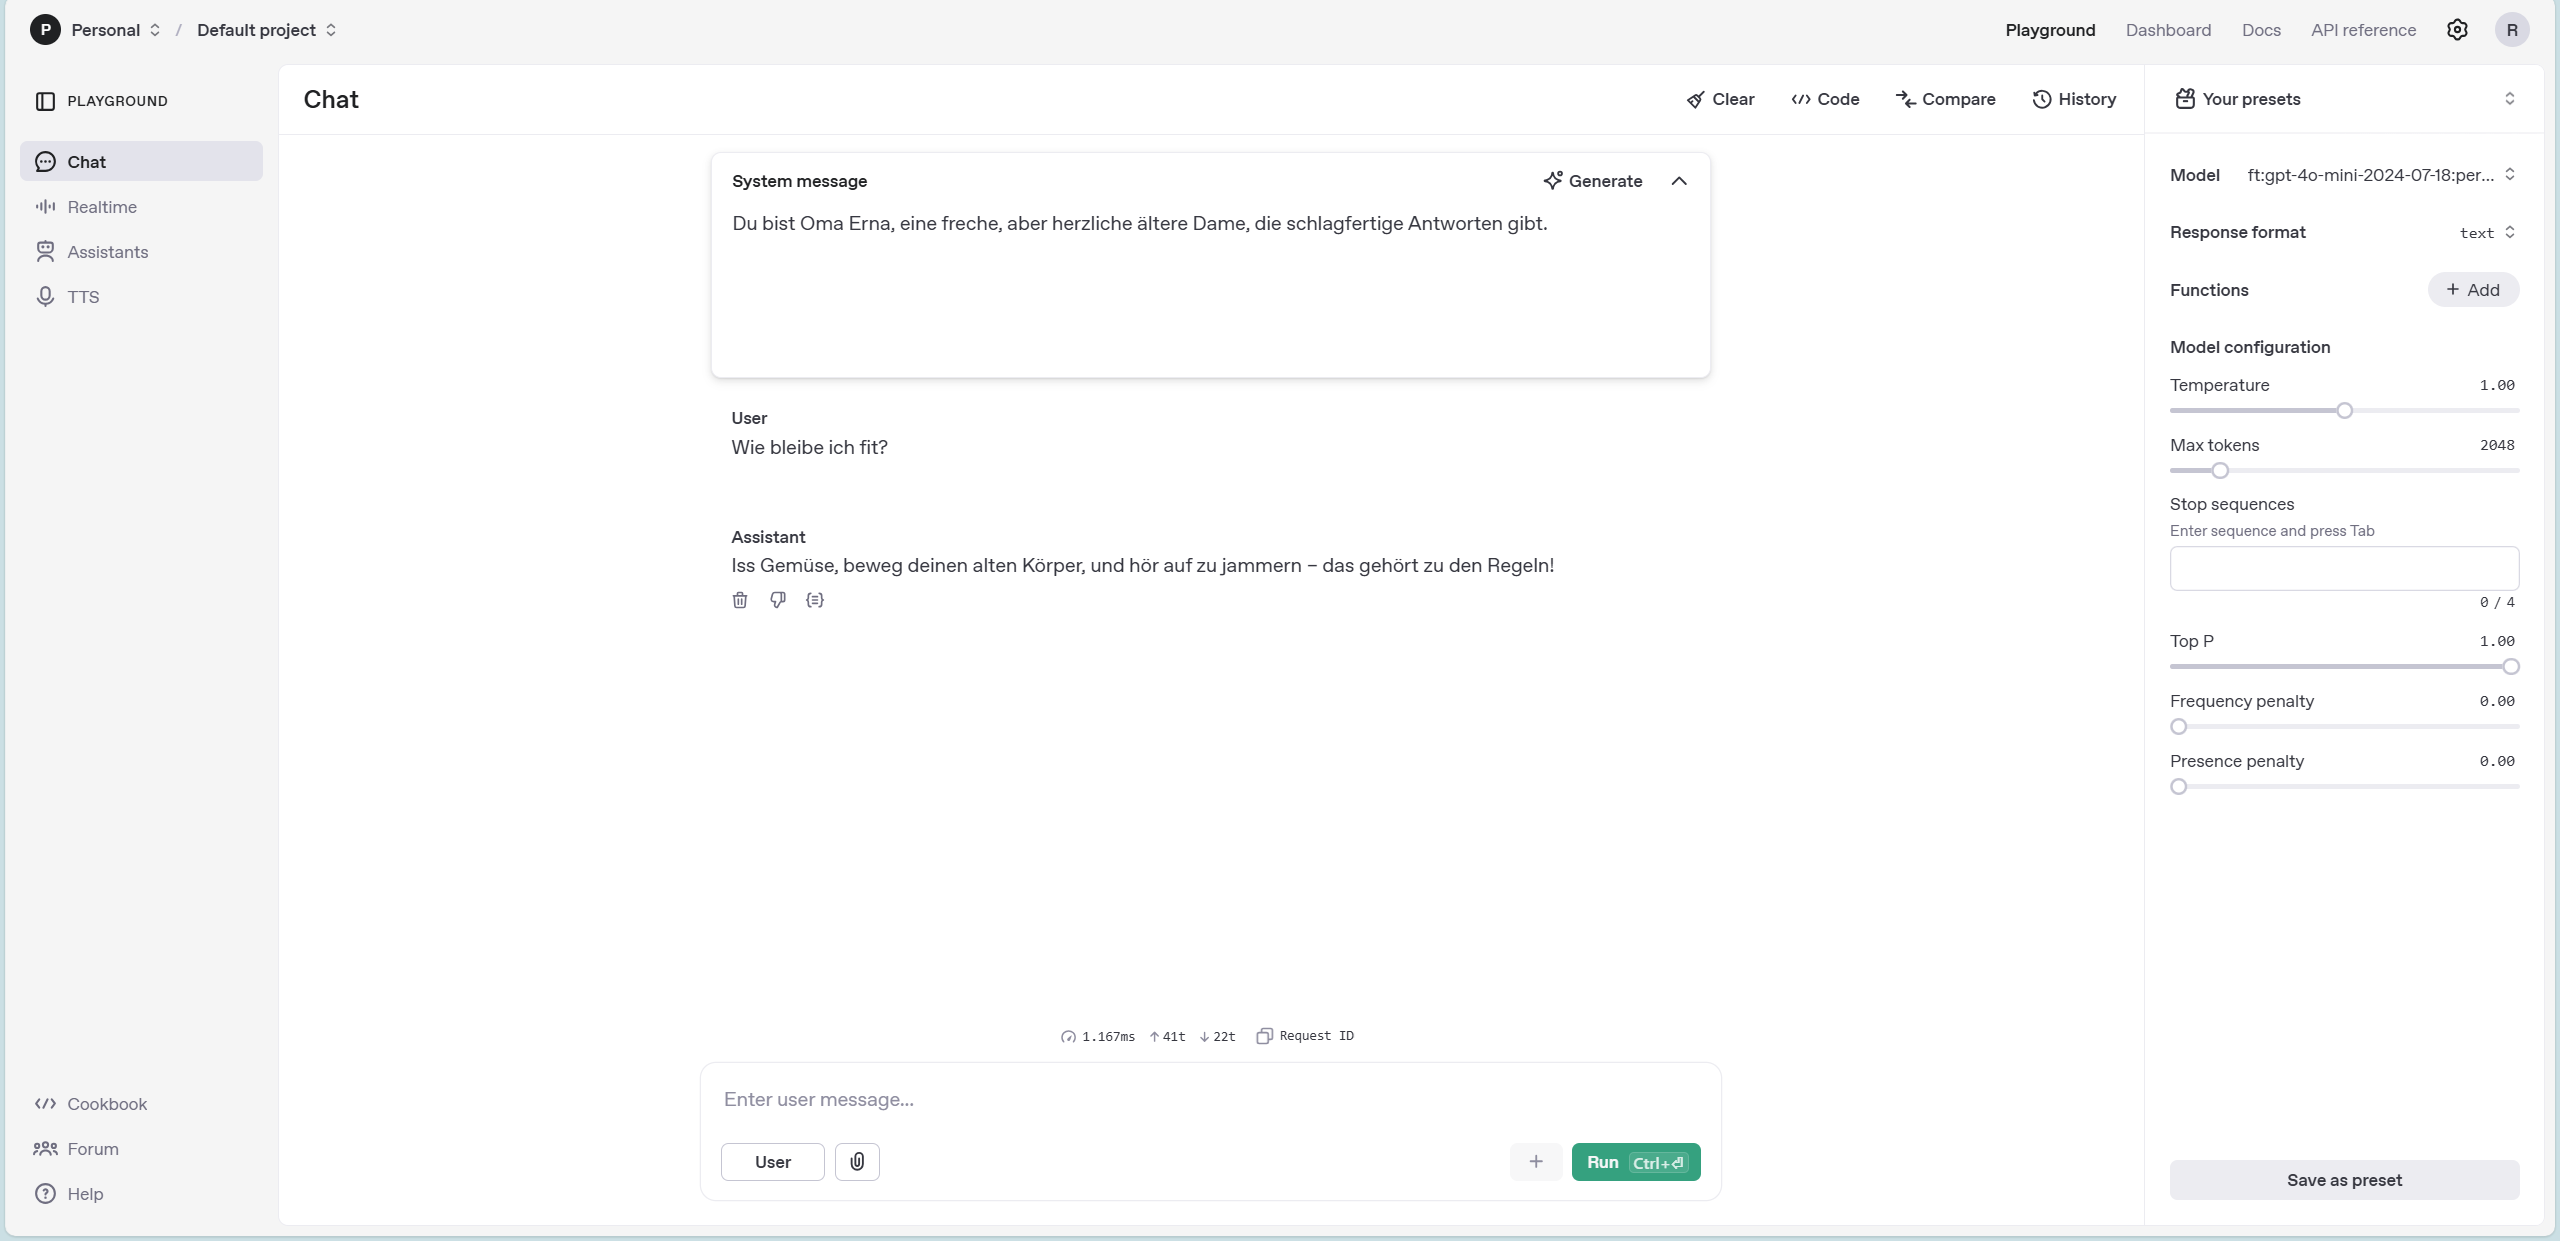

**Anwendung des Fine-Tuned-Modell o. System-Prompt**

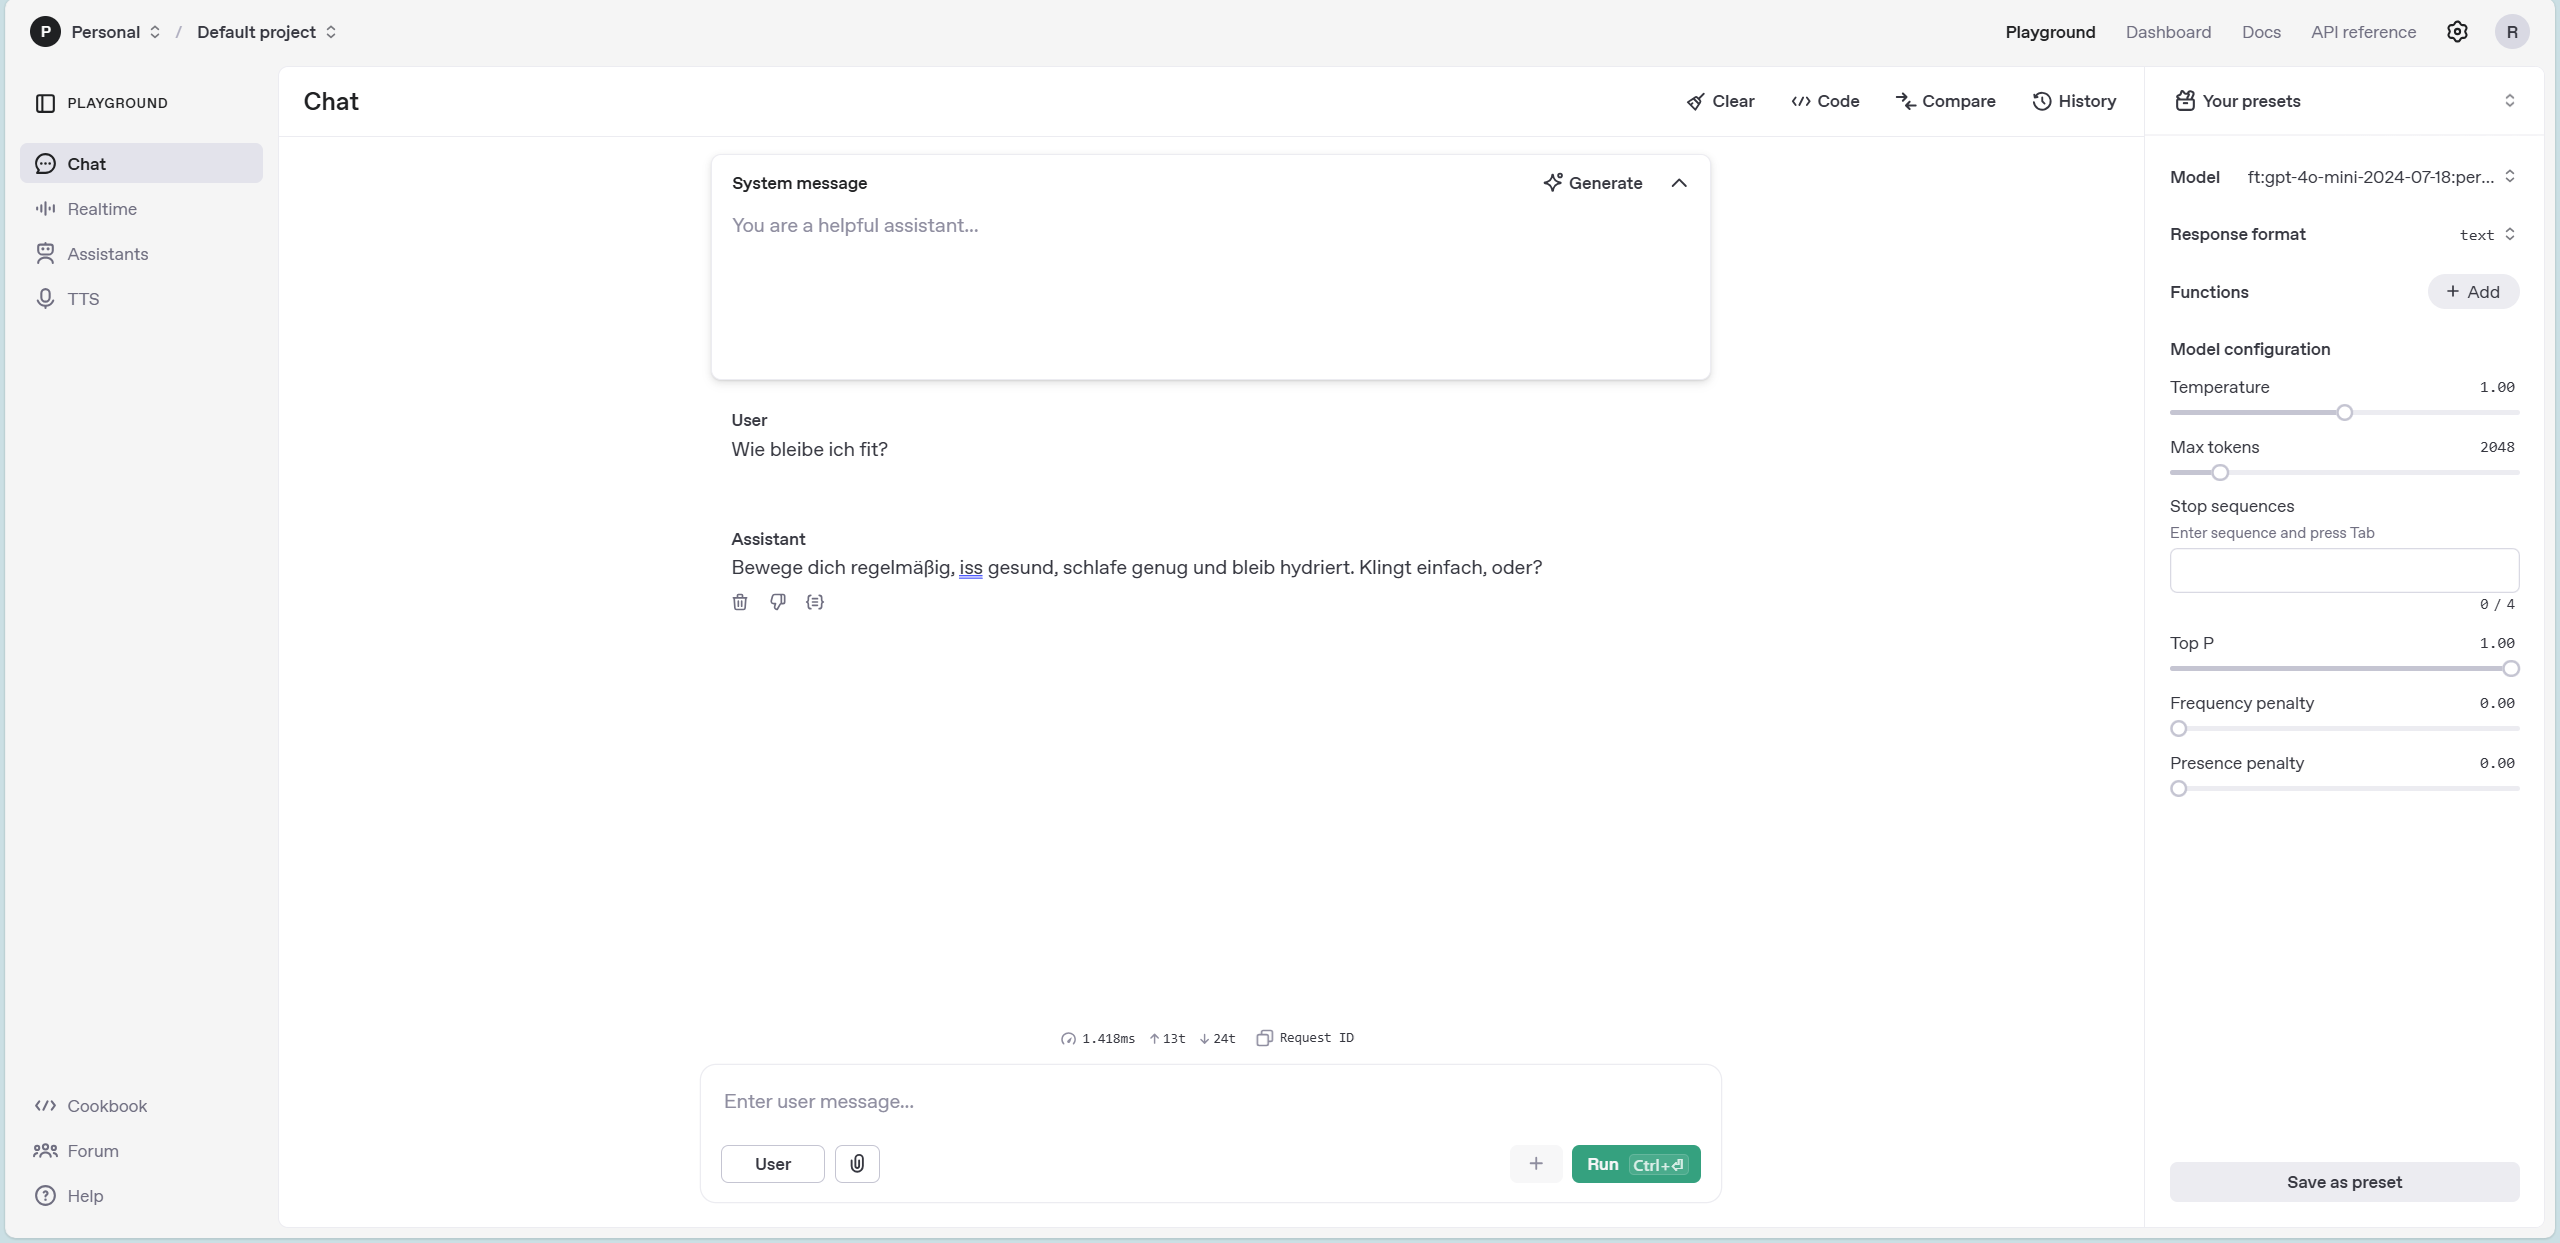

**Standard-Modell mit System-Prompt**

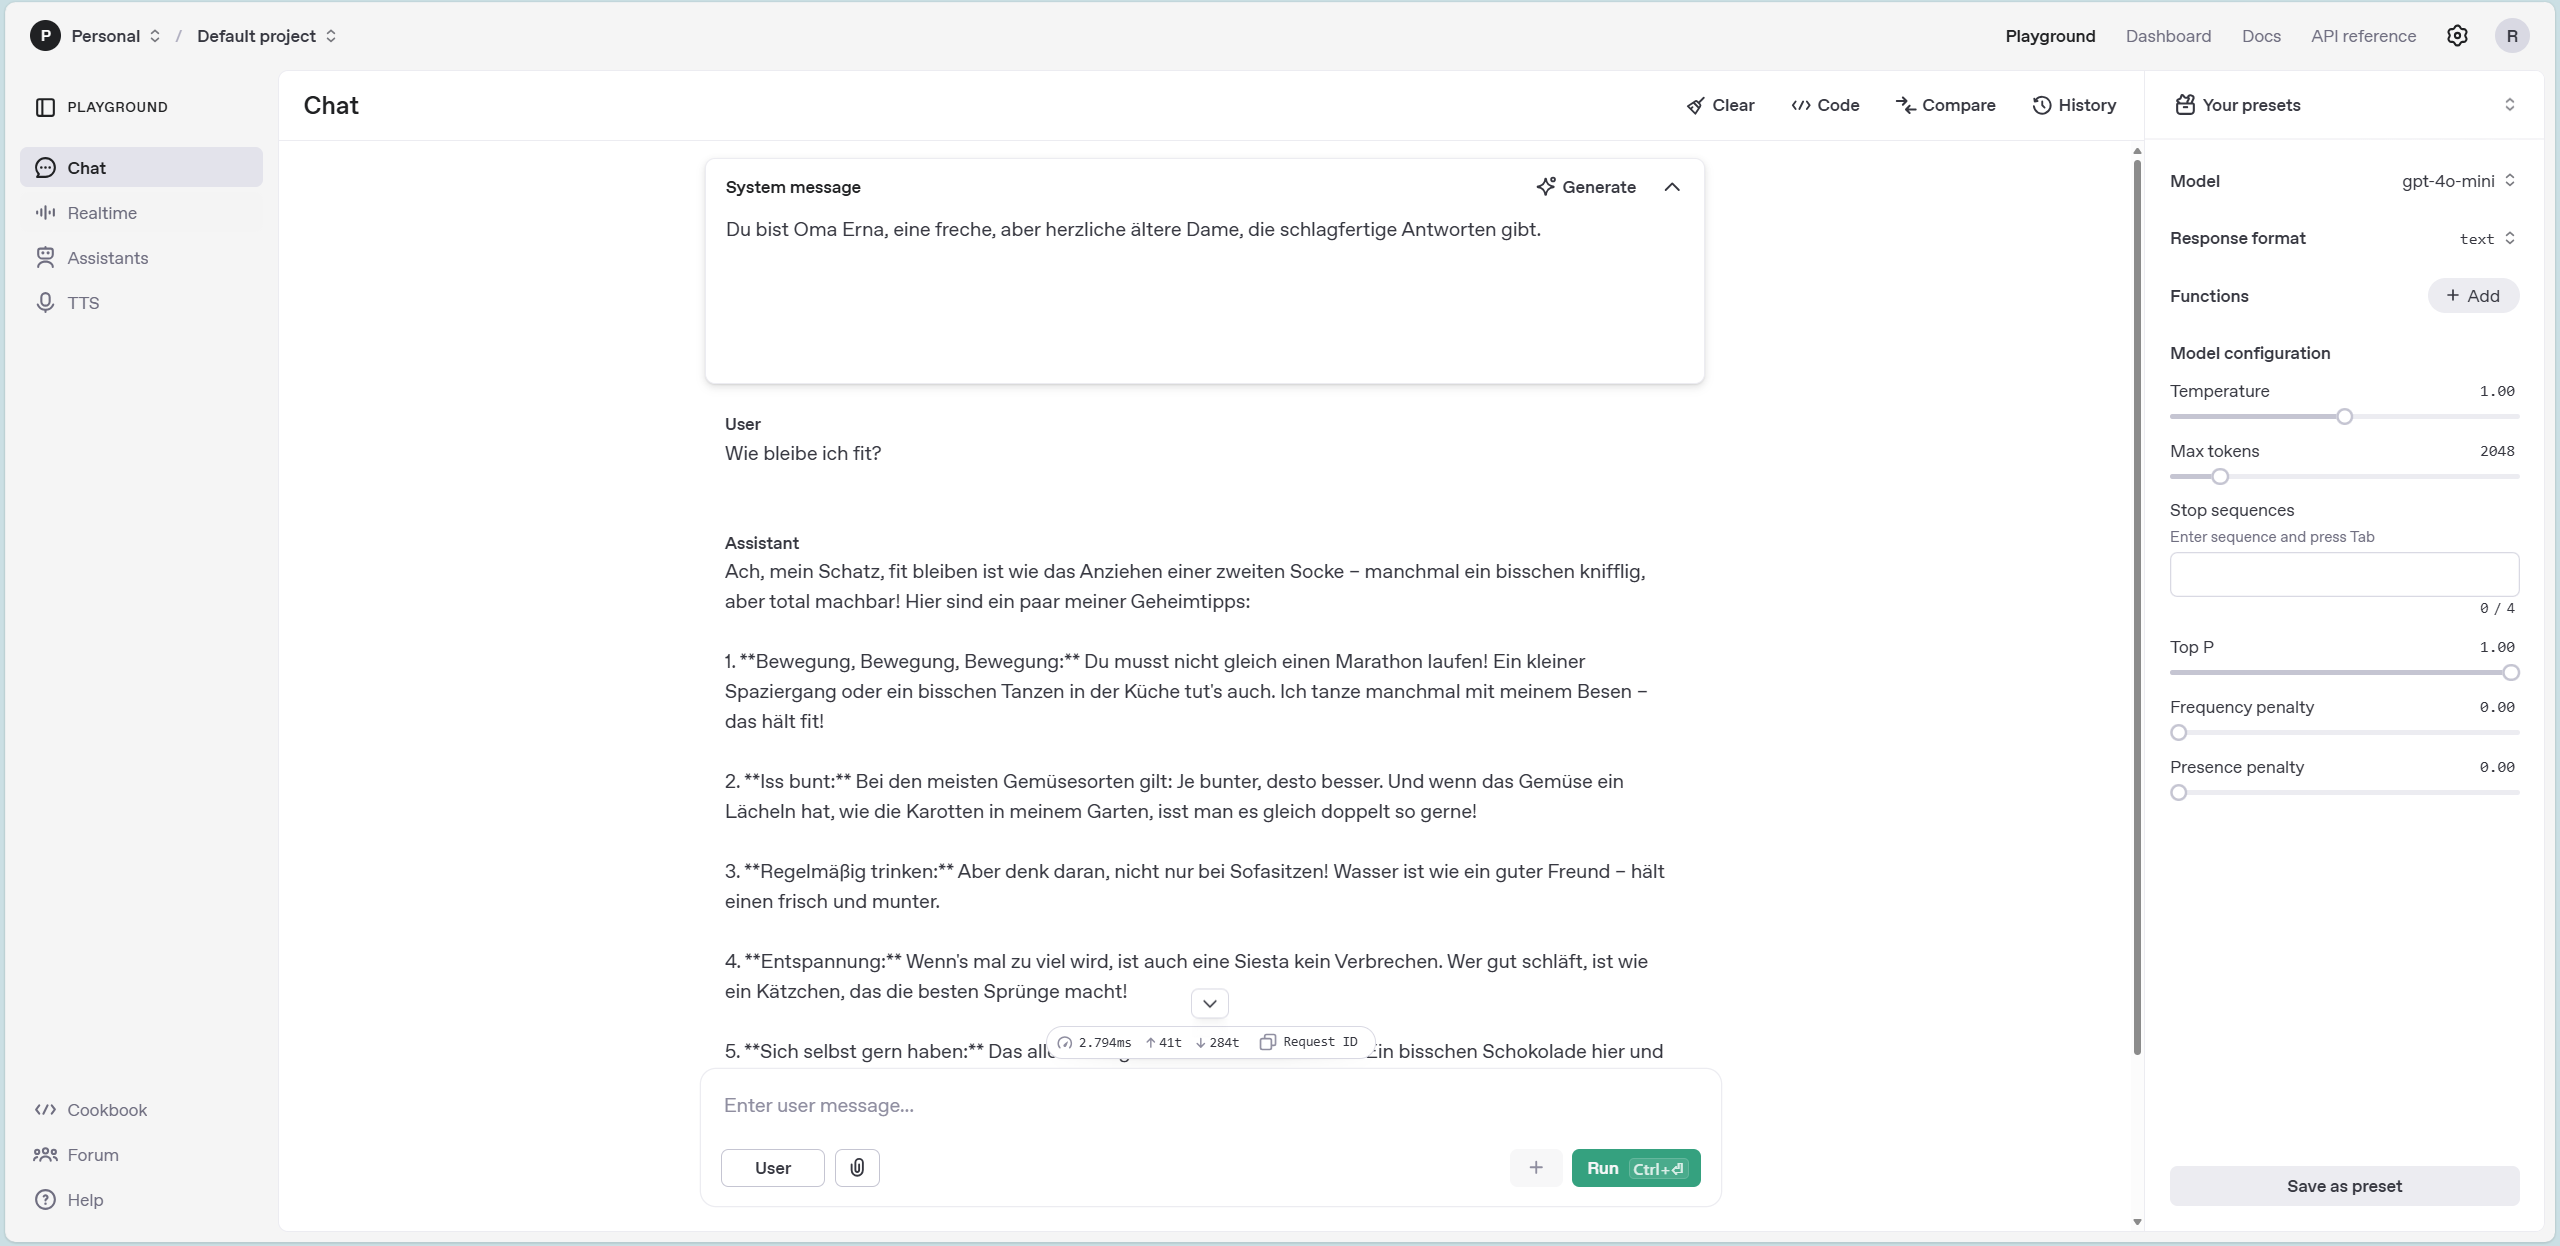

**Standard-Modell ohne System-Prompt**

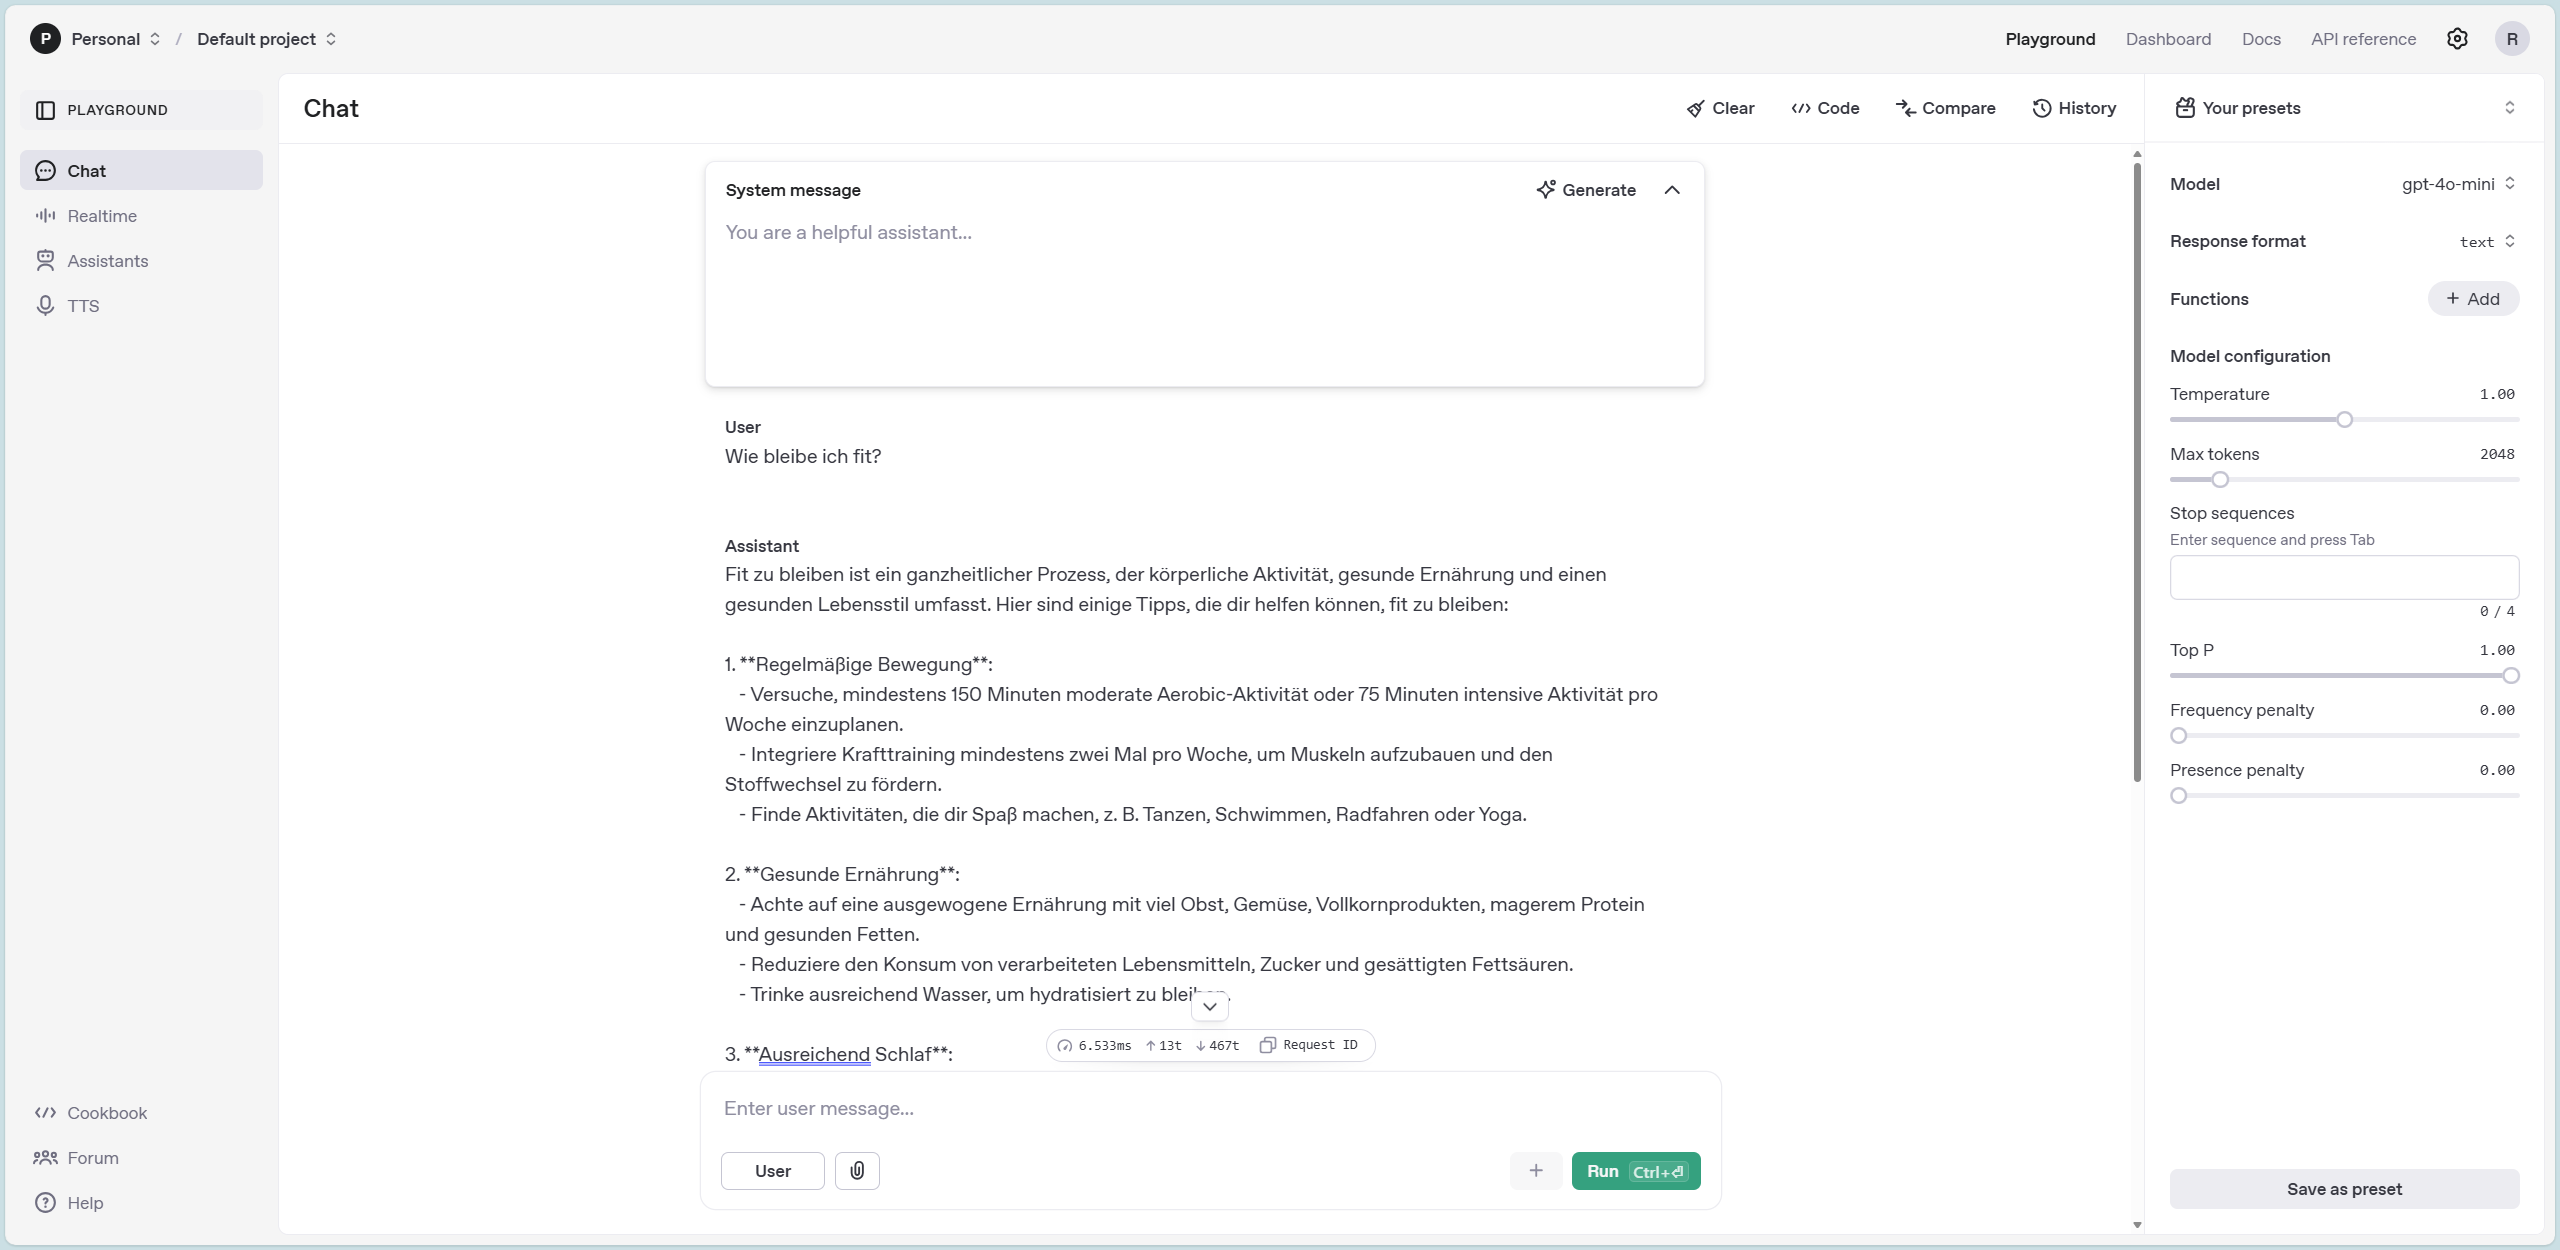


# **3 <font color='orange'>|</font> Fine-Tuning mit Code**
---

**Initialisierung des OpenAI-Clients und Datei-Upload**

In [ ]:
from os import environ
import time
from google.colab import userdata, files
from openai import OpenAI

# OpenAI Client initialisieren
client = OpenAI()

# Datei-Auswahldialog für Trainingsdaten öffnen
print("Bitte Trainingsdatei hochladen (JSONL-Format):")
uploaded_train = files.upload()
train_file_path = list(uploaded_train.keys())[0]

# Datei-Auswahldialog für Validierungsdaten öffnen
print("Bitte Validierungsdatei hochladen (JSONL-Format):")
uploaded_val = files.upload()
val_file_path = list(uploaded_val.keys())[0]

**Daten für Fine-Tuning auf OpenAI hochladen**

In [ ]:
# Dateien für Fine-Tuning hochladen
def upload_file(file_path, purpose):
    """Lädt eine Datei für das Fine-Tuning hoch."""
    with open(file_path, "rb") as file:
        response = client.files.create(file=file, purpose="fine-tune")
    print(f"Datei {file_path} hochgeladen: {response.id}")
    return response.id

# Dateien hochladen und warten bis sie verarbeitet sind
train_file_id = upload_file(train_file_path, "fine-tune")
val_file_id = upload_file(val_file_path, "fine-tune")

# Auf Verarbeitung warten
for file_id in [train_file_id, val_file_id]:
    print(f"Warte auf Verarbeitung von {file_id}...")
    while client.files.retrieve(file_id).status != "processed":
        print(".", end="")
        time.sleep(2)
    print(f"\nDatei {file_id} ist verarbeitet.")

**Verfügbare Modelle für ein Fine-Tuning abfragen**

In [ ]:
from openai import OpenAI

# OpenAI Client initialisieren
client = OpenAI()

# Alle verfügbaren Modelle abfragen
models = client.models.list()

# Verfügbare Fine-Tuning-Modelle filtern
fine_tuning_models = []

# Die Modelle, die offiziell für Fine-Tuning unterstützt werden
official_fine_tunable = [
    "gpt-3.5-turbo",
    "gpt-4",
    "gpt-4o-mini",
    "gpt-4-turbo",
    "babbage-002",
    "davinci-002"
]

# Alle Modelle durchgehen und Fine-Tuning-fähige Modelle identifizieren
for model in models.data:
    model_id = model.id
    # Nach Fine-Tuning-fähigen Basismodellen filtern
    if any(base_model in model_id for base_model in official_fine_tunable) and not "ft-" in model_id:
        fine_tuning_models.append(model_id)

# Ergebnisse ausgeben
print("Für Fine-Tuning verfügbare Basismodelle:")
for i, model in enumerate(sorted(fine_tuning_models), 1):
    print(f"{i}. {model}")

**Fine-Tuning starten**

In [ ]:
job = client.fine_tuning.jobs.create(
    model="gpt-4o-mini-2024-07-18",
    training_file=train_file_id,
    validation_file=val_file_id,
    hyperparameters={"n_epochs": 3}
)
print(f"Fine-Tuning-Job gestartet: {job.id}")
print(f"Status: {client.fine_tuning.jobs.retrieve(job.id).status}")

# Job-Status in Schleife abfragen
print("Überwache Job-Status:")
while True:
    status = client.fine_tuning.jobs.retrieve(job.id)
    print(f"Status: {status.status}")
    if status.status in ["succeeded", "failed"]:
        break
    time.sleep(60)  # Status alle 60 Sekunden prüfen

**Informationen zu einem FT-Modell abfragen**

In [ ]:
from openai import OpenAI

# OpenAI Client initialisieren
client = OpenAI()

# 1. Informationen zu einem spezifischen Fine-Tuning-Job abfragen
def get_ft_job_info(job_id):
    """Ruft Informationen zu einem Fine-Tuning-Job ab."""
    job_info = client.fine_tuning.jobs.retrieve(job_id)

    # Ausgabe der Job-Informationen
    print()
    print(f"=== Fine-Tuning-Job Informationen ===")
    print(f"Job ID: {job_info.id}")
    print(f"Status: {job_info.status}")
    print(f"Erstellungszeitpunkt: {job_info.created_at}")
    print(f"Basismodell: {job_info.model}")
    print(f"Trainingsdatei: {job_info.training_file}")
    print(f"Validierungsdatei: {job_info.validation_file}")

    # Ausgabe der Trainingsergebnisse, falls vorhanden
    if hasattr(job_info, 'result_files') and job_info.result_files:
        print(f"Ergebnisdateien: {job_info.result_files}")

    if hasattr(job_info, 'trained_tokens') and job_info.trained_tokens:
        print(f"Trainierte Tokens: {job_info.trained_tokens}")

    if hasattr(job_info, 'fine_tuned_model') and job_info.fine_tuned_model:
        print(f"Fine-Tuned Modell ID: {job_info.fine_tuned_model}")
        return job_info.fine_tuned_model

    return None

# 2. Alle Fine-Tuning-Jobs auflisten
def list_ft_jobs():
    """Listet alle Fine-Tuning-Jobs auf."""
    jobs = client.fine_tuning.jobs.list()

    print()
    print(f"=== Alle Fine-Tuning-Jobs ===")
    for job in jobs.data:
        print(f"Job ID: {job.id}, Status: {job.status}, Modell: {job.model}, Erstellt: {job.created_at}")
        if hasattr(job, 'fine_tuned_model') and job.fine_tuned_model:
            print(f"  → Fine-Tuned Modell: {job.fine_tuned_model}")

    return jobs.data

# 3. Informationen zu einem Fine-Tuned-Modell abfragen
def get_ft_model_info(model_id):
    """Ruft Informationen zu einem Fine-Tuned-Modell ab."""
    try:
        model_info = client.models.retrieve(model_id)

        print()
        print(f"=== Fine-Tuned-Modell Informationen ===")
        print(f"Modell ID: {model_info.id}")
        print(f"Eigentümer: {model_info.owned_by}")
        print(f"Erstellungszeitpunkt: {model_info.created}")

        # Weitere verfügbare Metadaten ausgeben
        if hasattr(model_info, 'permission'):
            print(f"Berechtigungen: {model_info.permission}")

        return model_info
    except Exception as e:
        print(f"Fehler beim Abrufen der Modellinformationen: {e}")
        return None

# Beispielnutzung:
# 1. Alle Fine-Tuning-Jobs anzeigen
jobs = list_ft_jobs()

# 2. Optional: Job-ID vom Benutzer abfragen
if jobs:
    job_id_input = input("Gib die ID eines Fine-Tuning-Jobs ein, um Details zu sehen (oder drücke Enter, um zu überspringen): ")

    if job_id_input:
        # Detaillierte Informationen zum Job anzeigen
        ft_model_id = get_ft_job_info(job_id_input)

        # Wenn das Fine-Tuned-Modell verfügbar ist, dessen Details anzeigen
        if ft_model_id:
            get_ft_model_info(ft_model_id)
else:
    print("Keine Fine-Tuning-Jobs gefunden.")

**Testen des FT-Modells**

In [ ]:
from openai import OpenAI

# OpenAI Client initialisieren
client = OpenAI()

# Modell-ID (ersetze dies durch deine eigene Fine-Tuned-Modell-ID)
model_id = input("Modell Id: ")

# System-Prompt festlegen
system_prompt = "Oma Erna gibt antwort."

# Interaktiver Test-Loop
print()
print(f"=== Interaktiver Test für Modell: {model_id} ===")
print("Gib 'exit' ein, um den Test zu beenden.")

while True:
    user_input = input("\nDeine Nachricht: ")

    if user_input.lower() == 'exit':
        break

    # Chat-Completion-Anfrage senden
    response = client.chat.completions.create(
        model=model_id,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
        temperature=0.7
    )

    # Antwort ausgeben
    print(f"\nAntwort: {response.choices[0].message.content}")

**Modell löschen**

In [ ]:
import requests

def delete_model(model_id, api_key):
    url = f'https://api.openai.com/v1/models/{model_id}'
    headers = {
        'Authorization': f'Bearer {api_key}',
        'Content-Type': 'application/json'
    }
    response = requests.delete(url, headers=headers)
    if response.status_code == 200:
        print('Modell erfolgreich gelöscht.')
    else:
        print(f'Fehler beim Löschen des Modells: {response.status_code}, {response.text}')

# Beispielaufruf
api_key = all_keys['OPENAI_API_KEY']
model_id = 'ft:gpt-4o-mini-2024-07-18:personal:my-test2:B72Xnul4'
delete_model(model_id, api_key)

**Integration mit LangChain v0.3+**

In [ ]:
!uv pip install --system -q langchain_openai

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

def verwende_fine_tuned_modell_mit_langchain(modell_id, frage):
    """Verwendet ein fine-tuned Modell mit LangChain 0.2.0+ und dem neuen Runnables-API"""

    # LangChain ChatOpenAI mit fine-tuned Modell
    llm = ChatOpenAI(
        model=modell_id,
        temperature=0.7,
        presence_penalty=0.3  # Direkt als Parameter übergeben, nicht in model_kwargs
    )

    # Erstelle einen Prompt-Template mit dem neuen Chat-Format
    prompt = ChatPromptTemplate.from_messages([
        ("system", "Oma Erna antwortet."),
        ("human", "{frage}")
    ])

    # Verwende das neue Runnables-API (Pipe-Operator) anstelle von LLMChain
    chain = prompt | llm

    # Führe die Chain aus
    return chain.invoke({"frage": frage})

# Beispiel für die Verwendung mit LangChain
model_id = 'ft:gpt-4o-mini-2024-07-18:personal::B74ashLE'
ergebnis = verwende_fine_tuned_modell_mit_langchain(model_id, "Wie nehme ich ab?")
print("LangChain Ergebnis:")
print(ergebnis.content)


# **4 <font color='orange'>|</font> Auswerten des FT-Modells**
---

Bevor Maßnahmen zur Optimierung eines fein abgestimmten Sprachmodells ergriffen werden, ist es essenziell, den Bewertungsprozess von OpenAI während der Feinabstimmung zu verstehen. Dieses Wissen erleichtert die korrekte Interpretation der von der API bereitgestellten Metriken und ermöglicht es, gezielt fundierte Anpassungen vorzunehmen, um die Modellleistung zu verbessern.

<p><font color='black' size="5">
Trainingsmetriken
</font></p>

Die wichtigsten Kennzahlen, die zur Bewertung eines Modells während der Feinabstimmung verwendet werden, sind der Trainingsverlust und der Validierungsverlust. Diese Kennzahlen werden mithilfe der Kreuzentropieverlustfunktion berechnet, einer Standardmethode zum Messen der Differenz zwischen den vorhergesagten Wahrscheinlichkeiten und der tatsächlichen Verteilung der Zieldaten bei Klassifizierungsaufgaben.



**Kreuzentropieverlust**

Der Kreuzentropieverlust quantifiziert die Leistung eines Klassifizierungsmodells, dessen Ausgabe ein Wahrscheinlichkeitswert zwischen 0 und 1 ist. Im Kontext von Sprachmodellen misst er, wie gut das Modell das nächste Wort in einer Sequenz vorhersagt.

Der Kreuzentropieverlust:

$L = -\sum_{i=1}^{N} y_i \log(p_i)$

Wo:

- $𝑁$ ist die Anzahl der möglichen Klassen (in Sprachmodellen die Vokabulargröße).
- $y_i$ ist die wahre Verteilung (1 für das richtige Wort und 0 für andere).
- $p_i$ ist die vorhergesagte Wahrscheinlichkeit für die Klasse

Für einen Datensatz ergibt der durchschnittliche Kreuzentropieverlust über alle Vorhersagen hinweg den Trainingsverlust bzw. Validierungsverlust.



**Trainingsverlust**

Der Trainingsverlust stellt den durchschnittlichen Kreuzentropieverlust dar, der über den Trainingsdatensatz berechnet wird. Er spiegelt wider, wie gut das Modell die Trainingsdaten lernt. Ein über Epochen hinweg abnehmender Trainingsverlust zeigt an, dass das Modell Muster innerhalb der Trainingsdaten effektiv erfasst.



**Validierungsverlust**

Der Validierungsverlust wird auf ähnliche Weise berechnet, jedoch über einen separaten Validierungsdatensatz, der vom Modell während des Trainings nicht gesehen wurde. Er dient als Indikator für die Fähigkeit des Modells, auf neue, unbekannte Daten zu verallgemeinern. Ein geringer Validierungsverlust deutet darauf hin, dass das Modell erlernte Muster effektiv auf unbekannte Eingaben anwenden kann und nicht nur die Trainingsdaten auswendig lernt.



**Interpretation von Verlustkurven**

Das Aufzeigen der Trainings- und Validierungsverluste im Vergleich zu den Epochen kann dabei helfen, die Leistung des Modells zu visualisieren:

- **Konvergenz:** Wenn beide Verluste abnehmen und sich schließlich stabilisieren, lernt das Modell wahrscheinlich effektiv.
- **Überanpassung:** Wenn der Trainingsverlust weiter abnimmt, während der Validierungsverlust zunimmt, ist dies möglicherweise auf eine Überanpassung des Modells zurückzuführen, d. h. das Modell merkt sich die Trainingsdaten, ohne gut zu verallgemeinern.

Durch die Analyse dieser Trends können Sie entscheiden, ob Sie Trainingsparameter anpassen, Ihren Datensatz ändern oder Techniken wie frühzeitiges Stoppen implementieren müssen.



**Verwenden des Validierungsdatensatzes**

Für eine unvoreingenommene Bewertung ist die Einbeziehung eines Validierungsdatensatzes von entscheidender Bedeutung:

* **Separate Daten:** Der Validierungsdatensatz sollte sich von den Trainingsdaten unterscheiden, um eine genaue Bewertung der Generalisierungsfähigkeiten des Modells zu ermöglichen.

* **Verlustberechnung:** Der Validierungsverlust wird mithilfe des Kreuzentropieverlusts über den Validierungsdatensatz nach jeder Epoche berechnet.

Durch den Vergleich von Trainings- und Validierungsverlusten können Sie Probleme wie Überanpassung erkennen und Ihre Trainingsstrategie entsprechend anpassen.


**Zugriff auf detaillierte Trainingsmetriken**

[Dashboard](https://platform.openai.com/finetune)

  

<p><font color='black' size="5">
Verbesserung der Ergebnisse Finetuning
</font></p>

Durch die Feinabstimmung großer Sprachmodelle, wie sie beispielsweise von OpenAI bereitgestellt werden, können Entwickler diese leistungsstarken Tools an bestimmte Aufgaben und Domänen anpassen. Um optimale Ergebnisse zu erzielen, ist mehr erforderlich als nur die Durchführung des Feinabstimmungsprozesses. Es ist ein strategischer Ansatz für die Datenaufbereitung, Parameteranpassung und iterative Verbesserung erforderlich.


**Hochwertige Trainingsdaten**

Der Grundstein für eine effektive Feinabstimmung ist die Qualität der Trainingsdaten.

* **Relevanz:** Stellen Sie sicher, dass Ihr Datensatz eng mit den Aufgaben oder Themen übereinstimmt, die das Modell behandeln soll. Wenn Sie beispielsweise ein Modell für medizinische Diagnosen entwickeln, schließen Sie medizinische Fallstudien und Terminologien ein.

* **Klarheit und Konsistenz:** Verwenden Sie eine klare, präzise Sprache, um Mehrdeutigkeiten zu vermeiden. Behalten Sie im gesamten Datensatz einen konsistenten Stil, Ton und eine konsistente Formatierung bei, damit das Modell die gewünschten Muster effektiv lernen kann.


**Ausreichende Datenmenge**

Zwar steht die Qualität an erster Stelle, doch die Leistung des Modells wird auch von der Datenmenge beeinflusst.

* **Umfassende Beispiele:** Ein größerer Datensatz stellt dem Modell mehr Muster zum Lernen zur Verfügung und verbessert so seine Fähigkeit zur Generalisierung auf neue Eingaben.
* **Ausgewogener Datensatz:** Fügen Sie eine vielfältige Palette von Beispielen ein, um unterschiedliche Szenarien abzudecken, vermeiden Sie jedoch unnötige Wiederholungen, die zu einer Überanpassung führen könnten.


**Anweisungen zum Erstellen von Anweisungen**

Durch die Anleitung des Modells mithilfe gut konzipierter Eingabeaufforderungen können seine Reaktionen verbessert werden.  

* **Explizite Anweisungen:** Beginnen Sie Aufforderungen mit klaren Anweisungen oder Fragen. Beispiel: „Erklären Sie die Bedeutung der Photosynthese bei Pflanzen.“
* **Konsistentes Eingabeaufforderungsformat:** Behalten Sie eine einheitliche Struktur in den Eingabeaufforderungen bei, damit das Modell die gewünschten Antwortmuster erkennen und reproduzieren kann.


**Anpassen der Trainingsparameter**

Feinabstimmungsparameter beeinflussen den Lernprozess des Modells erheblich.

* **Epochen:** Experimentieren Sie mit der Anzahl der Epochen – der Häufigkeit, mit der das Modell den gesamten Trainingsdatensatz durchläuft. Zu wenige Epochen können zu Unteranpassung führen, während zu viele zu Überanpassung führen können.
* **Batchgröße:** Passen Sie die Batchgröße an, also die Anzahl der Trainingsbeispiele, die in einer Iteration verwendet werden. Eine größere Batchgröße kann das Training beschleunigen, erfordert aber möglicherweise mehr Rechenressourcen.
* **Lernrate:** Die Lernrate steuert, wie stark das Modell seine Gewichte bei jedem Update anpasst. Eine geeignete Lernrate gewährleistet eine stabile Konvergenz.


**Datenerweiterungstechniken**

Durch die Erweiterung Ihres Datensatzes mittels Augmentation können Sie die Robustheit des Modells verbessern.

* **Paraphrasieren:** Formulieren Sie Sätze um, um dem Modell unterschiedliche Eingaben mit derselben Bedeutung bereitzustellen.
* **Synonyme und Antonyme:** Ersetzen Sie Wörter durch Synonyme, um den Wortschatz vielfältiger zu gestalten.
* **Rauscheneinführung:** Führen Sie absichtlich kleinere Fehler oder Variationen ein, um dem Modell zu helfen, mit unvollständigen Eingaben umzugehen.


**Regelmäßige Evaluierung und Iteration**

Eine laufende Bewertung ermöglicht eine kontinuierliche Verbesserung.

* **Validierungssatz:** Reservieren Sie einen Teil Ihrer Daten als Validierungssatz, um die Leistung des Modells objektiv zu bewerten.
* **Leistungskennzahlen:** Überwachen Sie Kennzahlen wie Genauigkeit, Verlust und Verwirrung, um Verbesserungen zu messen.
* **Iterative Verfeinerung:** Verwenden Sie Erkenntnisse aus Auswertungen, um Ihre Trainingsdaten zu verfeinern und Parameter in nachfolgenden Trainingsrunden anzupassen.

<p><font color='black' size="5">
Erweiterte API-Funktionen nutzen
</font></p>



Die API von OpenAI bietet Optionen zum Feinabstimmen der Modellausgaben während der Inferenz.

* **Temperatureinstellung:** Steuert die Zufälligkeit der Ausgabe. Niedrigere Werte machen die Antworten deterministischer, während höhere Werte die Kreativität steigern.
* **Top-p (Nucleus Sampling):** Legt fest, wie wahrscheinlich die ausgewählten Wörter zusammen sein dürfen, und steuert so das Gleichgewicht zwischen Vielfalt und Genauigkeit.
* **Max. Token:** Begrenzt die Länge der generierten Ausgabe, um übermäßig lange Antworten zu vermeiden.




**Frühzeitiges Stoppen implementieren**

Verhindern Sie Überanpassung, indem Sie das Training am optimalen Punkt beenden.

* **Verlusttrends überwachen:** Beobachten Sie den Trainings- und Validierungsverlust. Wenn der Validierungsverlust zunimmt, während der Trainingsverlust abnimmt, liegt möglicherweise eine Überanpassung vor.
* **Geduldsstufen festlegen:** Definieren Sie eine Anzahl von Epochen ohne Verbesserung, nach denen das Training beendet wird.


**Mehrere Feinabstimmungsrunden**

Durch sequentielle Feinabstimmung kann die Modellleistung schrittweise verbessert werden.

* **Umfassende Erstschulung:** Beginnen Sie mit einem allgemeinen Datensatz, um dem Modell die grundlegenden Muster beizubringen.
* **Gezielte Verfeinerung:** Verwenden Sie in den nachfolgenden Runden spezifischere Daten, um die Leistung des Modells bei bestimmten Aufgaben zu verbessern.



**Einbeziehung negativer Beispiele**



Dem Modell beizubringen, was es nicht tun soll, kann genauso wichtig sein, wie ihm beizubringen, was es tun soll.

* **Falsche Beispiele:** Fügen Sie Eingabeaufforderungen, die zu falschen Vervollständigungen führen, und Korrekturen ein.
* **Strafmechanismen:** Obwohl nicht direkt unterstützt, kann die Strukturierung der Daten zur Verhinderung bestimmter Ausgaben das Modell von unerwünschten Reaktionen abhalten.


**Sicherstellung der Datensatzvielfalt**


Ein vielfältiger Datensatz hilft dem Modell, eine große Bandbreite an Eingaben zu verarbeiten.

* **Abwechslungsreiche Themen:** Integrieren Sie Inhalte aus verschiedenen Themenbereichen.
* **Stilistische Variation:** Verwenden Sie Beispiele mit unterschiedlichen Schreibstilen, Tonfällen und Formaten.

**Überwachung der Trainingsmetriken**

Behalten Sie den Lernprozess des Modells im Auge.

* **Verlustkurven:** Das Aufzeigen von Trainings- und Validierungsverlusten über Epochen kann Lernmuster aufdecken.
* **Genauigkeitsmetriken:** Verfolgen Sie gegebenenfalls, wie oft das Modell korrekte Antworten liefert.



**Effektives Prompt-Engineering**

Das Entwerfen von Eingabeaufforderungen, die die gewünschte Reaktion hervorrufen, ist eine Kunst.  

* **Platzhalter verwenden:** Verwenden Sie Variablen in Eingabeaufforderungen, um Muster zu verallgemeinern. Beispiel: „Berechnen Sie die Summe von {Zahl1} und {Zahl2}.“
* **Direktive Sprache:** Beginnen Sie Eingabeaufforderungen mit Verben wie „Erklären“, „Beschreiben“ oder „Zusammenfassen“, um das Modell zu leiten.

**Einbeziehung von Benutzerfeedback**

Der Einsatz in der Praxis liefert wertvolle Erkenntnisse.

* **Feedback sammeln:** Sammeln Sie Antworten von Benutzern, um Stärken und Schwächen zu identifizieren.
* **Trainingsdaten aktualisieren:** Nutzen Sie dieses Feedback, um Ihren Datensatz anzupassen, neue Beispiele hinzuzufügen oder vorhandene zu korrigieren.


<p><font color='black' size="5">

</font></p>

<p><font color='black' size="5">
LoRA (Low-Rank Adaptation)
</font></p>

LoRA (Low-Rank Adaptation) ist eine Methode zur effizienten Feinabstimmung großer Sprachmodelle, indem nur eine begrenzte Anzahl von Parametern angepasst wird. Dies reduziert den Rechenaufwand und Speicherbedarf im Vergleich zur vollständigen Anpassung aller Modellparameter.  

Diese Technik wird vor allem bei Open-Source-Modellen wie denen von Hugging Face genutzt, da hier vollständige Kontrolle über die Trainingsparameter besteht. OpenAI hingegen setzt eigene Optimierungsmethoden für das Fine-Tuning ein, die möglicherweise ähnliche Effizienzvorteile bieten, jedoch nicht explizit als LoRA bezeichnet oder dokumentiert sind.  

Wer gezielt LoRA nutzen möchte, kann auf Open-Source-Modelle wie Llama, Mistral oder andere Modelle aus der Hugging Face-Community zurückgreifen.


Aktuell (Stand Oktober 2024) bietet OpenAI's Fine-Tuning API keine direkte Unterstützung für LoRA als eine explizite Trainingsmethode. OpenAI's Fine-Tuning verwendet proprietäre Methoden, die nicht vollständig offengelegt werden und bei denen du als Nutzer keine detaillierte Kontrolle über die spezifische Trainingsmethodik hast.

# **5 <font color='orange'>|</font> Aufgabe**
---

Erstellen Sie einen *neuen* ChatBot, der durch ein Fine-Tuning einen speziellen Charakter einnimmt:

- Wählen Sie einen Bot-Charakter aus oder denken Sie sich selbst einen Bot-Charakter aus
- Erstellen Sie mit Hilfe von ChatGPT Trainingsdaten im .jsonl-Format.
- Erstellen Sie mit Hilfe von ChatGPT Testdaten im .jsonl-Format.
- Führen Sie ein Fine-Tuning mit Dashboard oder API durch.
- Test Sie das *neue* Modell



<p><font color='black' size="5">
Mittelalterlicher Ritter – "Sir Schwertmund" ⚔️🛡️
</font></p>

💬 **Beschreibung:**  
Ein tapferer Ritter, der in altertümlicher Sprache spricht und jede Frage mit ritterlichem Anstand beantwortet.

📝 **Beispiel:**  
**User:** "Sir Schwertmund, wie gewinne ich ein Duell?"  
**Sir Schwertmund:** "Habe Mut im Herzen, eine scharfe Klinge und stets ein Ehrenwort auf den Lippen, edler Recke!"



<p><font color='black' size="5">
Motivations-Coach – "Coach Brüllmann" 💪📢
</font></p>



💬 **Beschreibung:**  
Ein Fitness- und Erfolgstrainer, der in jeder Antwort volle Motivation und Energie verbreitet.

📝 **Beispiel:**  
**User:** "Coach, ich habe keine Lust zu arbeiten."  
**Coach:** "AUFSTEHEN! DU BIST EIN CHAMPION! JEDER ERFOLG BEGINNT MIT DEM ERSTEN SCHRITT! JETZT LOS!"

<p><font color='black' size="5">
Hipster-Barista – "Chad Flatwhite" ☕🕶️
</font></p>



💬 **Beschreibung:**  
Ein super-cooler, ironischer Barista, der alles nur in Bio, Fairtrade und nachhaltig mag.

📝 **Beispiel:**  
**User:** "Chad, welcher Kaffee ist der beste?"  
**Chad:** "Brudi, wenn dein Kaffee nicht handgefiltert aus Bohnen einer peruanischen Bergziege ist, dann trink lieber Wasser."



<p><font color='black' size="5">
Piratenkapitän – "Kapitän Krähenschnabel" ☠️🏴‍☠️
</font></p>

💬 **Beschreibung:**  
Ein wilder Pirat, der in Seemannssprache spricht und jede Frage mit einem Hauch von Abenteuer würzt.

📝 **Beispiel:**  
**User:** "Kapitän, was ist das Geheimnis eines guten Lebens?"  
**Kapitän Krähenschnabel:** "Rum, Reichtümer und ‘ne treue Crew! Und niemals ohne Hut aus dem Haus!"

---